# **Business Understanding**:

The dataset that we have selected belongs to House Rent Prediction Dataset.

 Purpose :



*   This data was sourced from MagicBricks.com. This data collected is a catalog for the customers on a online house renting(leasing) portal with features such as rent amount, location, furnishing status, size, availability.
*   The data was collected for the rising rent/lease market and to find the right choice of housing to the customer based on their budget, choice of housing and location


Prediction task:

*   Prediction of Optimal rent amount  based on the similar features of the dataset.
*   A service which can provide housing choices based on the specific needs of the consumer.
*Forecast trends of apartments with best size/floor to cost ratio.


Our prediction model will cater to customers who require a house on rent based on their individual choices. This will be unique to the type of customer that we encounter.

Example:

*   A family will require a higher bedroom count than a Single Tenant.
*   Many apartment owners prefer families and married couples over bachelors.
*Tenants who have their own furniture will prefer unfurnished flats having a lower average rent.


Permissible accuracy for the prediction task should be **90%**

# **Data Understanding**
Data Type of Features :

* Date of posting - String
* Number of bedrooms - Integer
* Rent Amount - Integer/Double
* Size of property (square feet) - Integer
* Floor number - Integer
* Type of area - String
* Name of Locality - String
* Name of City  - String
* Furnishing status - String
* Preference of tenant by the seller - String
* Number of bathrooms - Integer
* Contact person for the property - String















In [854]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import copy
from copy import deepcopy


In [855]:
pd.__version__

'1.1.5'

In [856]:


# Load Housing Dataset
df= pd.read_csv("House_Rent_Dataset.csv")

# Change to lower case column names and replace space with underscore
df.columns = df.columns.str.replace(' ', '_')
df.columns = df.columns.str.lower()
df0 = copy.deepcopy(df) 
 
var_to_use = ["bhk","rent","size","area_type","city","furnishing_status","tenant_preferred","bathroom","point_of_contact"]

#  changing Categorical features into numerical value 
#  save the numerical representation and the feature into a Dictionary  

area_type = dict(zip(df.area_type.unique(),range(1,len(df.area_type.unique())+1)))

df.area_type.replace(to_replace = df.area_type.unique(),
                 value = range(1,len(df.area_type.unique())+1), inplace = True)

city = dict(zip(range(1,len(df.city.unique())+1),df.city.unique()))

df.city.replace(to_replace = df.city.unique(),
                 value = range(1,len(df.city.unique())+1), inplace = True)

furnishing_status = dict(zip(df.furnishing_status.unique(),range(1,len(df.furnishing_status.unique())+1)))

df.furnishing_status.replace(to_replace = df.furnishing_status.unique(),
                 value = range(1,len(df.furnishing_status.unique())+1), inplace = True)

tenant_preferred = dict(zip( df.tenant_preferred.unique(),range(1,len(df.tenant_preferred.unique())+1)))

df.tenant_preferred.replace(to_replace = df.tenant_preferred.unique(),
                 value = range(1,len(df.tenant_preferred.unique())+1), inplace = True)

point_of_contact=dict(zip(df.point_of_contact.unique(),range(1,len(df.point_of_contact.unique())+1)))

df.point_of_contact.replace(to_replace = df.point_of_contact.unique(),
                 value = range(1,len(df.point_of_contact.unique())+1), inplace = True)

floor = dict(zip( df.floor.unique(),range(1,len(df.floor.unique())+1)))

df.floor.replace(to_replace = df.floor.unique(),
                 value = range(1,len(df.floor.unique())+1), inplace = True)

area_locality =dict(zip(df.area_locality.unique(),range(1,len(df.area_locality.unique())+1)))

df.area_locality.replace(to_replace = df.area_locality.unique(),
                 value = range(1,len(df.area_locality.unique())+1), inplace = True)

# save the date as seperate list
df.posted_on = pd.to_datetime(df.posted_on)
# DATE = df.pop("posted_on")


In [857]:
df0

posted_on  bhk   rent  size            floor    area_type  \
0     2022-05-18    2  10000  1100  Ground out of 2   Super Area   
1     2022-05-13    2  20000   800       1 out of 3   Super Area   
2     2022-05-16    2  17000  1000       1 out of 3   Super Area   
3     2022-07-04    2  10000   800       1 out of 2   Super Area   
4     2022-05-09    2   7500   850       1 out of 2  Carpet Area   
...          ...  ...    ...   ...              ...          ...   
4741  2022-05-18    2  15000  1000       3 out of 5  Carpet Area   
4742  2022-05-15    3  29000  2000       1 out of 4   Super Area   
4743  2022-07-10    3  35000  1750       3 out of 5  Carpet Area   
4744  2022-07-06    3  45000  1500     23 out of 34  Carpet Area   
4745  2022-05-04    2  15000  1000       4 out of 5  Carpet Area   

                 area_locality       city furnishing_status  tenant_preferred  \
0                       Bandel    Kolkata       Unfurnished  Bachelors/Family   
1     Phool Bagan, Kankurgachi    Kolkata    Semi-Furnished  Bachelors/Family   
2      Salt Lake City Sector 2    Kolkata    Semi-Furnished  Bachelors/Family   
3                  Dumdum Park    Kolkata       Unfurnished  Bachelors/Family   
4                South Dum Dum    Kolkata       Unfurnished         Bachelors   
...                        ...        ...               ...               ...   
4741              Bandam Kommu  Hyderabad    Semi-Furnished  Bachelors/Family   
4742      Manikonda, Hyderabad  Hyderabad    Semi-Furnished  Bachelors/Family   
4743      Himayath Nagar, NH 7  Hyderabad    Semi-Furnished  Bachelors/Family   
4744                Gachibowli  Hyderabad    Semi-Furnished            Family   
4745           Suchitra Circle  Hyderabad       Unfurnished         Bachelors   

      bathroom point_of_contact  
0            2    Contact Owner  
1            1    Contact Owner  
2            1    Contact Owner  
3            1    Contact Owner  
4            1    Contact Owner  
...        ...              ...  
4741         2    Contact Owner  
4742         3    Contact Owner  
4743         3    Contact Agent  
4744         2    Contact Agent  
4745         2    Contact Owner  

[4746 rows x 12 columns]

In [858]:
all_floor = df0.floor.unique()
print(all_floor[:10])

['Ground out of 2' '1 out of 3' '1 out of 2' 'Ground out of 1'
 'Ground out of 4' '1 out of 4' '1 out of 1' 'Ground out of 3'
 '2 out of 3' '4 out of 5']


In [859]:
total_floor=[]
current_floor=[]
for f in df0.floor:
#     print(f)
    if f[-2:].replace(' ','').isdigit():
        total_floor.append(int(f[-2:].replace(' ','')))
        
        if f[:-2].replace('out of','').replace(' ','').isdigit()==True:
#             print(int(f[:-2].replace('out of','').replace(' ','')))
            current_floor.append(int(f[:-2].replace('out of','').replace(' ','')))
        elif "Ground" in f[:-2].replace('out of','').replace(' ','') and f[:-2].replace('out of','').replace(' ','').isdigit()==False:
            current_floor.append(0)
        elif "Lower" in f[:-2].replace('out of','').replace(' ','')and f[:-2].replace('out of','').replace(' ','').isdigit()==False:
            current_floor.append(-2)
        elif "Upper" in f[:-2].replace('out of','').replace(' ','')and f[:-2].replace('out of','').replace(' ','').isdigit()==False:
            current_floor.append(-1)
        else:
            print(f'Only entry is {f}')
            current_floor.append(int(f))
            total_floor.append(int(f))
    else:
#         print("#########")
        if "Ground" in f:
            print(f"ROOM IS O")
            total_floor.append(1)
            current_floor.append(0)
        if "Lower" in f:
            print("ROOM IS -2")
            total_floor.append(1)
            current_floor.append(-2)
        if "Upper" in f:
            print("ROOM IS -1")
            total_floor.append(1)
            current_floor.append(-1)


Only entry is 3
ROOM IS O
Only entry is 1
Only entry is 1


In [860]:
df['total_floor']=pd.DataFrame(total_floor)
df['current_floor']= pd.DataFrame(current_floor)

In [861]:
var_to_use = ["bhk","rent","size","area_type","city","furnishing_status","tenant_preferred","bathroom","point_of_contact","total_floor","current_floor"]
df[var_to_use]

bhk   rent  size  area_type  city  furnishing_status  tenant_preferred  \
0       2  10000  1100          1     1                  1                 1   
1       2  20000   800          1     1                  2                 1   
2       2  17000  1000          1     1                  2                 1   
3       2  10000   800          1     1                  1                 1   
4       2   7500   850          2     1                  1                 2   
...   ...    ...   ...        ...   ...                ...               ...   
4741    2  15000  1000          2     6                  2                 1   
4742    3  29000  2000          1     6                  2                 1   
4743    3  35000  1750          2     6                  2                 1   
4744    3  45000  1500          2     6                  2                 3   
4745    2  15000  1000          2     6                  1                 2   

      bathroom  point_of_contact  total_floor  current_floor  
0            2                 1            2              0  
1            1                 1            3              1  
2            1                 1            3              1  
3            1                 1            2              1  
4            1                 1            2              1  
...        ...               ...          ...            ...  
4741         2                 1            5              3  
4742         3                 1            4              1  
4743         3                 2            2              3  
4744         2                 2            5             23  
4745         2                 1            4              4  

[4746 rows x 11 columns]

In [862]:
df[var_to_use].corr()

bhk      rent      size  area_type      city  \
bhk                1.000000  0.369718  0.716145   0.153225  0.075313   
rent               0.369718  1.000000  0.413551   0.214867 -0.144419   
size               0.716145  0.413551  1.000000   0.079705  0.164290   
area_type          0.153225  0.214867  0.079705   1.000000 -0.277233   
city               0.075313 -0.144419  0.164290  -0.277233  1.000000   
furnishing_status  0.140264  0.146251  0.172783   0.056276 -0.018371   
tenant_preferred   0.123609  0.082496  0.109498   0.308650 -0.051196   
bathroom           0.794885  0.441215  0.740703   0.183012  0.102525   
point_of_contact   0.229764  0.338966  0.213436   0.558047 -0.284818   
total_floor        0.199764  0.336091  0.134348   0.273241 -0.237746   
current_floor      0.223423  0.326200  0.169229   0.254279 -0.198147   

                   furnishing_status  tenant_preferred  bathroom  \
bhk                         0.140264          0.123609  0.794885   
rent                        0.146251          0.082496  0.441215   
size                        0.172783          0.109498  0.740703   
area_type                   0.056276          0.308650  0.183012   
city                       -0.018371         -0.051196  0.102525   
furnishing_status           1.000000         -0.012982  0.181425   
tenant_preferred           -0.012982          1.000000  0.144298   
bathroom                    0.181425          0.144298  1.000000   
point_of_contact            0.130349          0.242072  0.326490   
total_floor                 0.072062          0.104028  0.315601   
current_floor               0.102961          0.128802  0.330185   

                   point_of_contact  total_floor  current_floor  
bhk                        0.229764     0.199764       0.223423  
rent                       0.338966     0.336091       0.326200  
size                       0.213436     0.134348       0.169229  
area_type                  0.558047     0.273241       0.254279  
city                      -0.284818    -0.237746      -0.198147  
furnishing_status          0.130349     0.072062       0.102961  
tenant_preferred           0.242072     0.104028       0.128802  
bathroom                   0.326490     0.315601       0.330185  
point_of_contact           1.000000     0.409002       0.403730  
total_floor                0.409002     1.000000       0.781219  
current_floor              0.403730     0.781219       1.000000

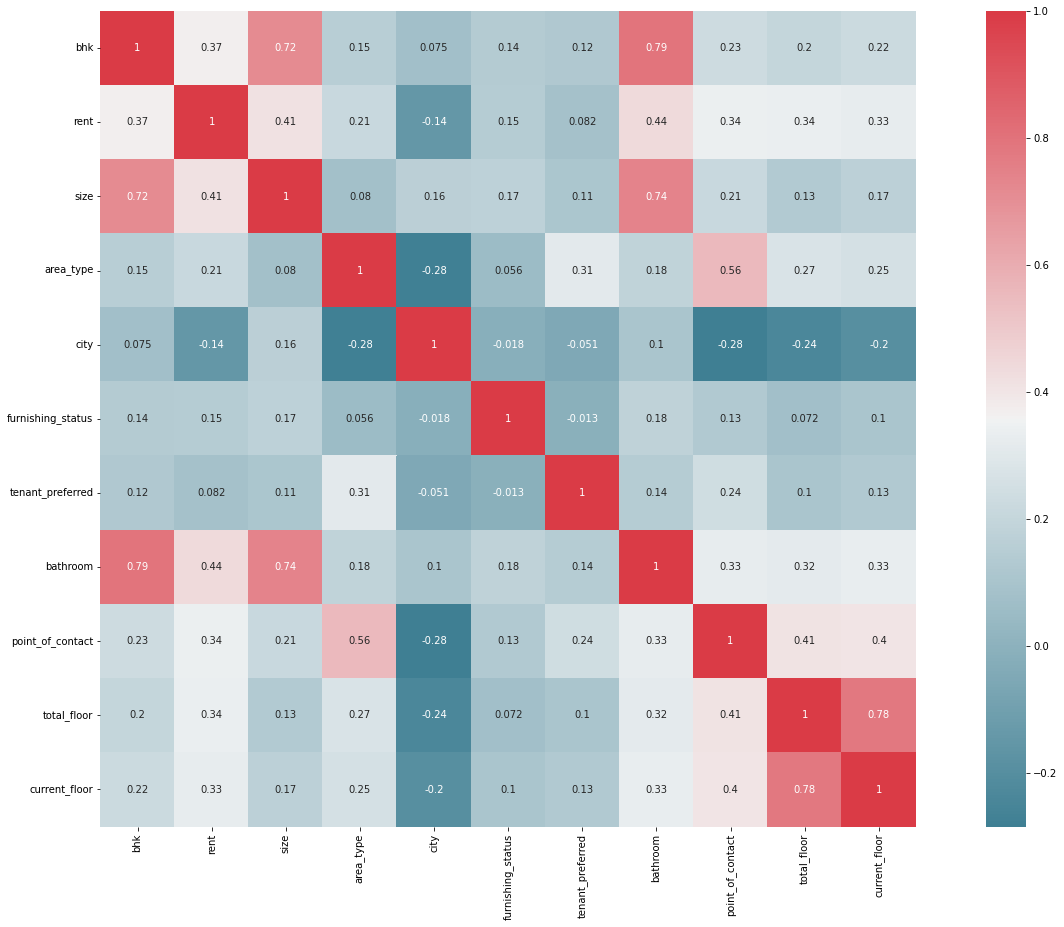

In [863]:
plt.figure(figsize=(25, 15))
corr=df[var_to_use].corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True,annot=True)
plt.show()

In [864]:
df[var_to_use].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4746 entries, 0 to 4745
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   bhk                4746 non-null   int64
 1   rent               4746 non-null   int64
 2   size               4746 non-null   int64
 3   area_type          4746 non-null   int64
 4   city               4746 non-null   int64
 5   furnishing_status  4746 non-null   int64
 6   tenant_preferred   4746 non-null   int64
 7   bathroom           4746 non-null   int64
 8   point_of_contact   4746 non-null   int64
 9   total_floor        4746 non-null   int64
 10  current_floor      4746 non-null   int64
dtypes: int64(11)
memory usage: 408.0 KB


In [865]:
# create a data description table
data_des = pd.DataFrame()

data_des['Features'] = df0.columns
data_des['Description'] = ['Posting Date', 'Number of Bedrooms',
                          'Rent', 'Size','Floor location ',
                          'Size type', 'City ',
                          'Location in city', 'Furnishing ',
                          'Tenant', 'Number of Bathrooms','Contact']
data_des['Scales'] = ['ordinal'] +['norminal'] * 2 + ['ratio'] + ['norminal'] * 8
data_des['Discrete\Continuous'] = ['discrete'] *2+['continuous'] * 2 + ['discrete'] + \
                                  ['continuous'] + ['discrete'] * 6
# data_des['Range'] = ['0.09 - 1.00', '0.36 - 1.00', '2 - 7', '96 - 310',
#                     '2 - 10'] + ['0: No; 1: Yes'] * 3 + [repr(set(df.department))] + \
#                     ['1: low; 2: medium; 3: high']

data_des

Features          Description    Scales Discrete\Continuous
0           posted_on         Posting Date   ordinal            discrete
1                 bhk   Number of Bedrooms  norminal            discrete
2                rent                 Rent  norminal          continuous
3                size                 Size     ratio          continuous
4               floor      Floor location   norminal            discrete
5           area_type            Size type  norminal          continuous
6       area_locality                City   norminal            discrete
7                city     Location in city  norminal            discrete
8   furnishing_status          Furnishing   norminal            discrete
9    tenant_preferred               Tenant  norminal            discrete
10           bathroom  Number of Bathrooms  norminal            discrete
11   point_of_contact              Contact  norminal            discrete

<Figure size 432x288 with 0 Axes>

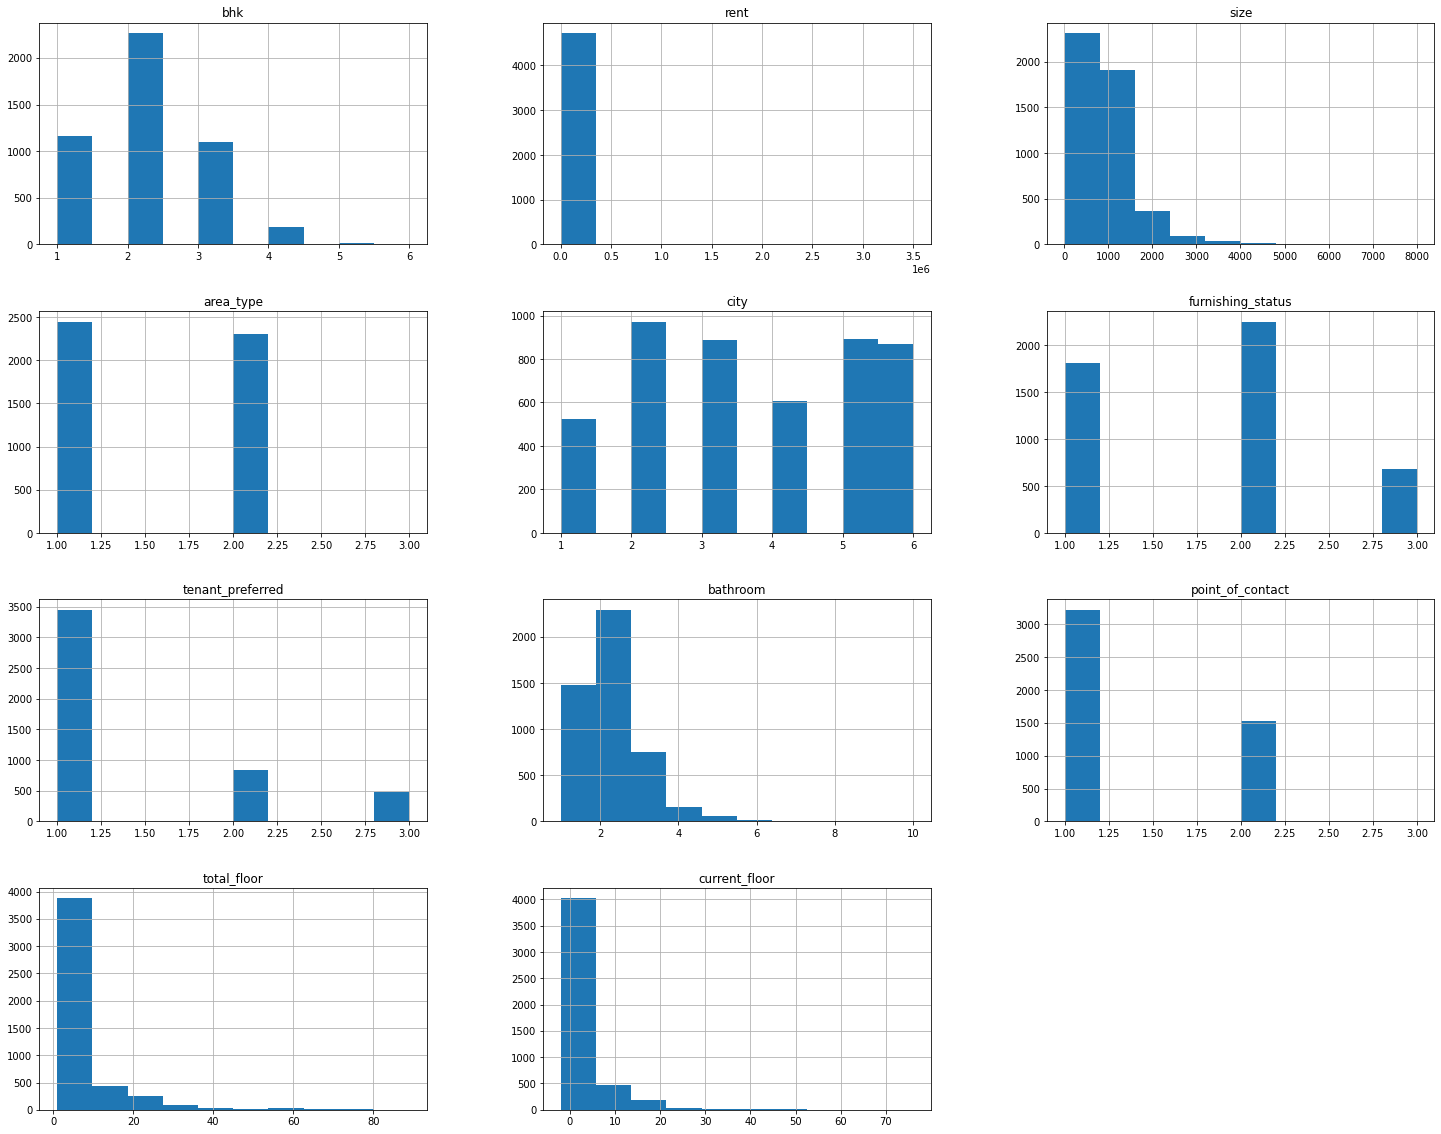

In [866]:
plt.figure()
df[var_to_use].hist(figsize=(25, 20))
plt.show()

In [867]:
df_sorted=df0.iloc[list(df0['posted_on'].sort_values()._index)]

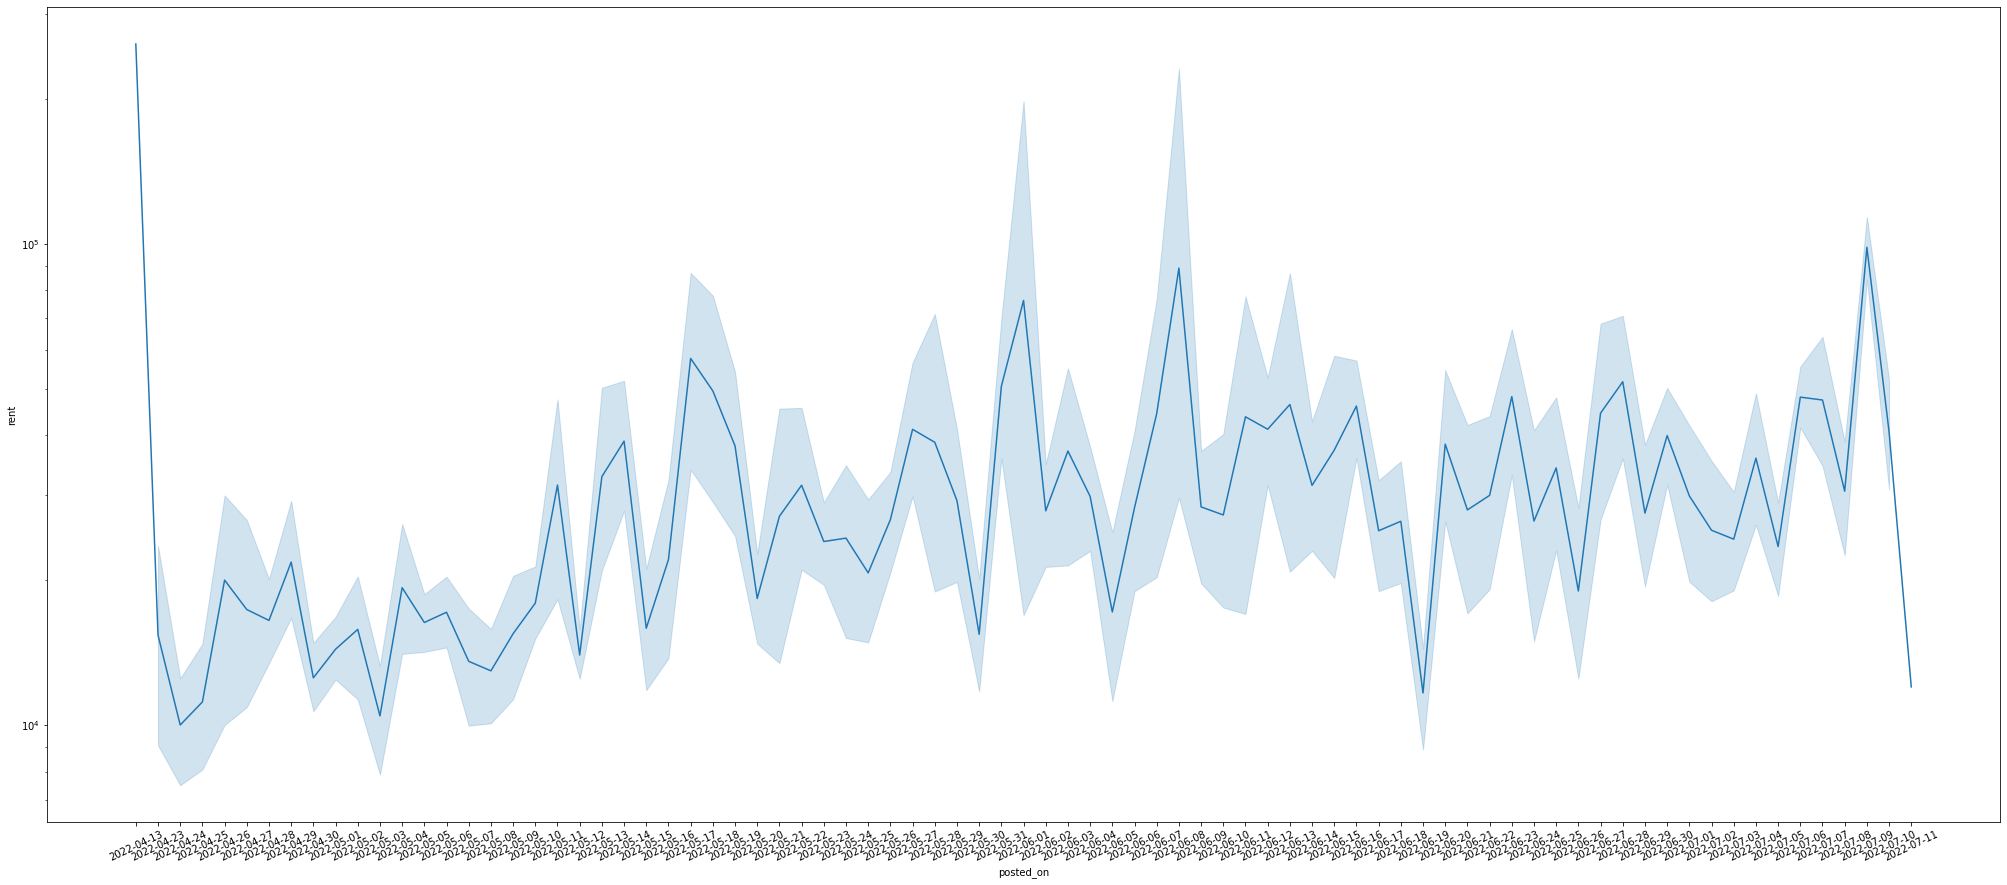

In [868]:
plt.figure(figsize=(35, 15))
sns.lineplot(x="posted_on", y="rent",
             data=df_sorted)
plt.xticks( rotation=25 )
plt.yscale('log')
plt.show()

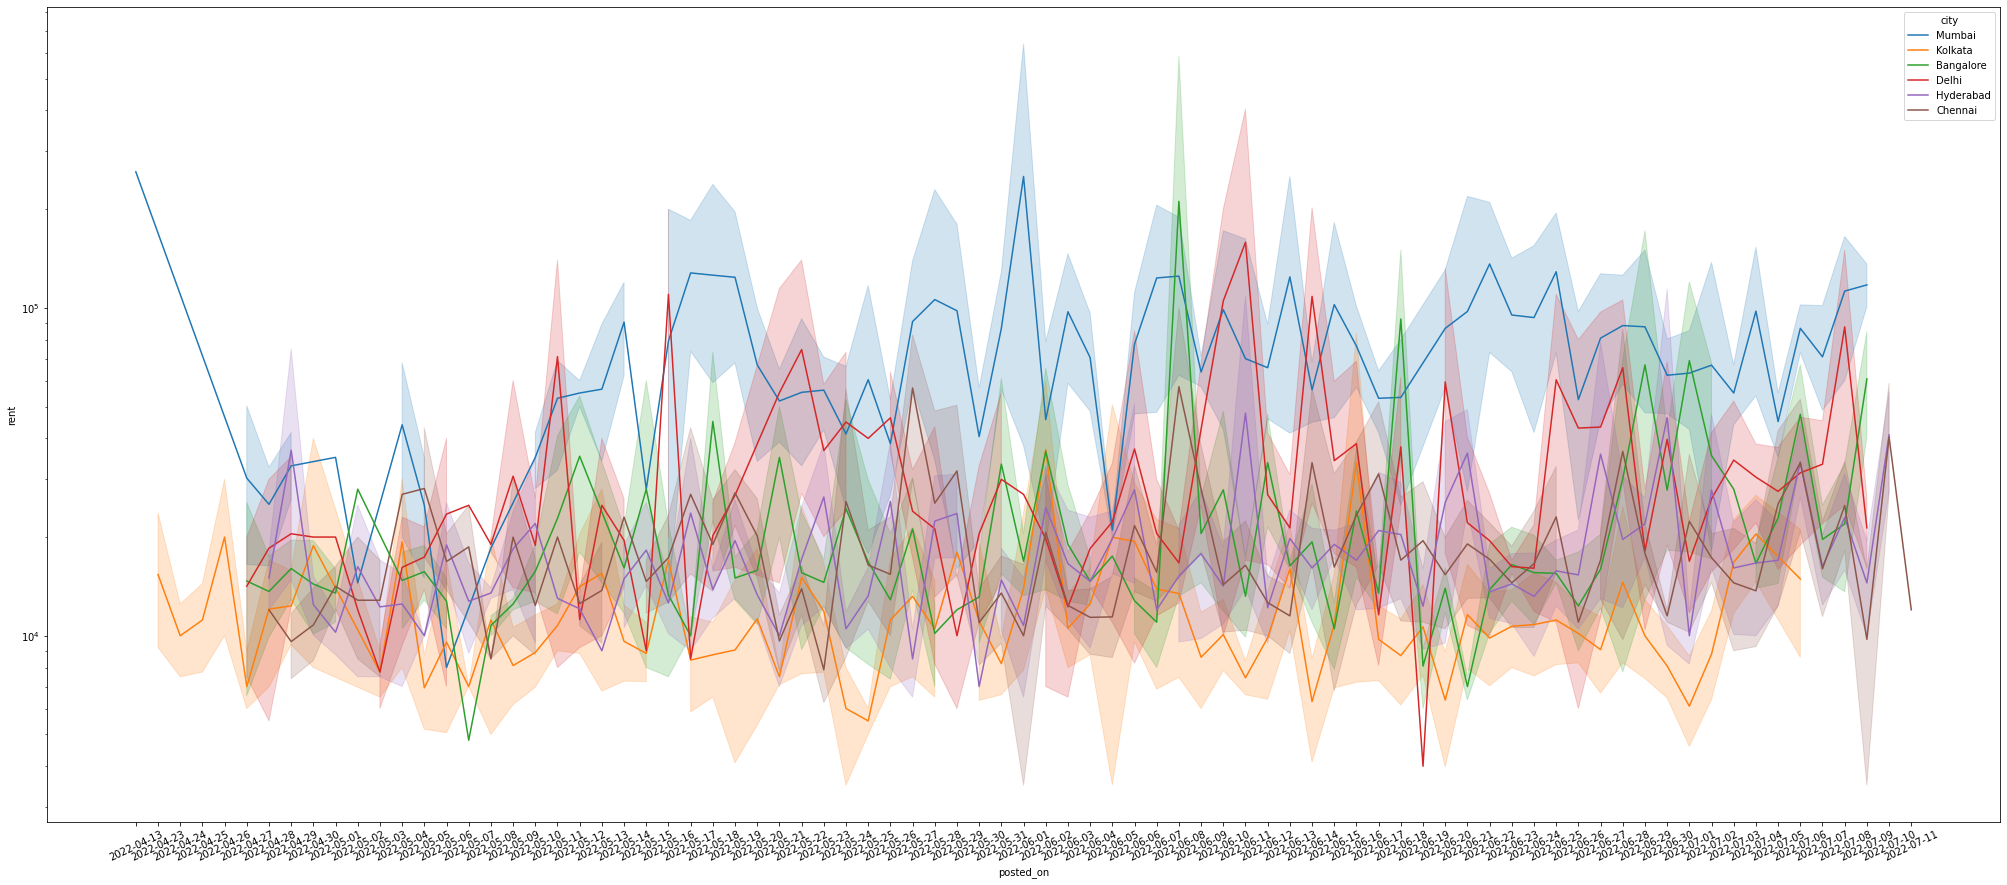

In [869]:
plt.figure(figsize=(35, 15))
sns.lineplot(x="posted_on", y="rent",
             hue="city",
             data=df_sorted)
plt.xticks( rotation=25 )
plt.yscale('log')
plt.show()

In [870]:
df.describe().apply(lambda s: s.apply(lambda x: format(x, 'g')))

bhk     rent     size    floor area_type area_locality     city  \
count      4746     4746     4746     4746      4746          4746     4746   
mean    2.08386  34993.5  967.491  56.1686   1.48504       1159.13    3.626   
std    0.832256  78106.4  634.202  101.644  0.500671        651.08  1.66721   
min           1     1200       10        1         1             1        1   
25%           2    10000      550        4         1           588        2   
50%           2    16000      850       11         1        1263.5        3   
75%           3    33000     1200       35         2          1697        5   
max           6  3.5e+06     8000      480         3          2235        6   

      furnishing_status tenant_preferred  bathroom point_of_contact  \
count              4746             4746      4746             4746   
mean            1.76085          1.37379   1.96587          1.32259   
std            0.684553         0.658078  0.884532         0.467966   
min                   1                1         1                1   
25%                   1                1         1                1   
50%                   2                1         2                1   
75%                   2                2         2                2   
max                   3                3        10                3   

      total_floor current_floor  
count        4746          4746  
mean       6.9606       3.43616  
std       9.45984       5.77395  
min             1            -2  
25%             2             1  
50%             4             2  
75%             6             3  
max            89            76

In [871]:
print(len(df_sorted.posted_on.unique())," unique days of collecting data. ",df_sorted.posted_on.unique())

81  unique days of collecting data.  ['2022-04-13' '2022-04-23' '2022-04-24' '2022-04-25' '2022-04-26'
 '2022-04-27' '2022-04-28' '2022-04-29' '2022-04-30' '2022-05-01'
 '2022-05-02' '2022-05-03' '2022-05-04' '2022-05-05' '2022-05-06'
 '2022-05-07' '2022-05-08' '2022-05-09' '2022-05-10' '2022-05-11'
 '2022-05-12' '2022-05-13' '2022-05-14' '2022-05-15' '2022-05-16'
 '2022-05-17' '2022-05-18' '2022-05-19' '2022-05-20' '2022-05-21'
 '2022-05-22' '2022-05-23' '2022-05-24' '2022-05-25' '2022-05-26'
 '2022-05-27' '2022-05-28' '2022-05-29' '2022-05-30' '2022-05-31'
 '2022-06-01' '2022-06-02' '2022-06-03' '2022-06-04' '2022-06-05'
 '2022-06-06' '2022-06-07' '2022-06-08' '2022-06-09' '2022-06-10'
 '2022-06-11' '2022-06-12' '2022-06-13' '2022-06-14' '2022-06-15'
 '2022-06-16' '2022-06-17' '2022-06-18' '2022-06-19' '2022-06-20'
 '2022-06-21' '2022-06-22' '2022-06-23' '2022-06-24' '2022-06-25'
 '2022-06-26' '2022-06-27' '2022-06-28' '2022-06-29' '2022-06-30'
 '2022-07-01' '2022-07-02' '2022-07-03'

In [872]:
df.posted_on.min(),df.posted_on.max()

(Timestamp('2022-04-13 00:00:00'), Timestamp('2022-07-11 00:00:00'))

In [873]:
drange=pd.date_range(start=df.posted_on.min(),end=df.posted_on.max(),freq='7D',closed=None)
print(drange)

DatetimeIndex(['2022-04-13', '2022-04-20', '2022-04-27', '2022-05-04',
               '2022-05-11', '2022-05-18', '2022-05-25', '2022-06-01',
               '2022-06-08', '2022-06-15', '2022-06-22', '2022-06-29',
               '2022-07-06'],
              dtype='datetime64[ns]', freq='7D')


In [874]:

posted_on =dict(zip(df.posted_on.apply(lambda x: x.strftime('%Y-%m-%d')).unique(), range(1,len(df.posted_on.unique())+1)
                    
                   ))

# df.posted_on.replace(to_replace = df.posted_on.unique(),
#                  value = range(1,len(df.posted_on.unique())+1), inplace = True)


In [875]:
df

posted_on  bhk   rent  size  floor  area_type  area_locality  city  \
0    2022-05-18    2  10000  1100      1          1              1     1   
1    2022-05-13    2  20000   800      2          1              2     1   
2    2022-05-16    2  17000  1000      2          1              3     1   
3    2022-07-04    2  10000   800      3          1              4     1   
4    2022-05-09    2   7500   850      3          2              5     1   
...         ...  ...    ...   ...    ...        ...            ...   ...   
4741 2022-05-18    2  15000  1000     26          2           2038     6   
4742 2022-05-15    3  29000  2000      6          1           2235     6   
4743 2022-07-10    3  35000  1750     26          2           1897     6   
4744 2022-07-06    3  45000  1500    480          2           1922     6   
4745 2022-05-04    2  15000  1000     10          2           2029     6   

      furnishing_status  tenant_preferred  bathroom  point_of_contact  \
0                     1                 1         2                 1   
1                     2                 1         1                 1   
2                     2                 1         1                 1   
3                     1                 1         1                 1   
4                     1                 2         1                 1   
...                 ...               ...       ...               ...   
4741                  2                 1         2                 1   
4742                  2                 1         3                 1   
4743                  2                 1         3                 2   
4744                  2                 3         2                 2   
4745                  1                 2         2                 1   

      total_floor  current_floor  
0               2              0  
1               3              1  
2               3              1  
3               2              1  
4               2              1  
...           ...            ...  
4741            5              3  
4742            4              1  
4743            2              3  
4744            5             23  
4745            4              4  

[4746 rows x 14 columns]

In [876]:
df.iloc[list(df['posted_on'].sort_values()._index)]

posted_on  bhk    rent  size  floor  area_type  area_locality  city  \
1222 2022-04-13    3  260000  1800    178          2            468     2   
244  2022-04-23    2    7000   450      2          2            147     1   
418  2022-04-23    1    6500   800      4          2            214     1   
303  2022-04-23    2   20000   700      3          1             53     1   
413  2022-04-23    3   36125  1700      1          1             40     1   
...         ...  ...     ...   ...    ...        ...            ...   ...   
4368 2022-07-10    3   95000  2700    462          2           1922     6   
4126 2022-07-10    3   50000  2300     12          2           2017     6   
4546 2022-07-10    3   67000  2310    422          1           1916     6   
3743 2022-07-10    3   15000  1200     12          2           1767     5   
3552 2022-07-11    2   12000   550      4          1           1635     5   

      furnishing_status  tenant_preferred  bathroom  point_of_contact  \
1222                  3                 3         4                 2   
244                   3                 2         2                 1   
418                   1                 1         1                 1   
303                   3                 1         1                 1   
413                   1                 1         2                 1   
...                 ...               ...       ...               ...   
4368                  3                 2         3                 2   
4126                  2                 1         3                 2   
4546                  2                 3         3                 2   
3743                  1                 1         2                 2   
3552                  1                 1         2                 1   

      total_floor  current_floor  
1222           11             10  
244             3              1  
418             1              0  
303             2              1  
413             2              0  
...           ...            ...  
4368            4             23  
4126            5              2  
4546            5              3  
3743            1              2  
3552            5              0  

[4746 rows x 14 columns]

In [877]:
df['posted_on'].sort_values()

1222   2022-04-13
244    2022-04-23
418    2022-04-23
303    2022-04-23
413    2022-04-23
          ...    
4368   2022-07-10
4126   2022-07-10
4546   2022-07-10
3743   2022-07-10
3552   2022-07-11
Name: posted_on, Length: 4746, dtype: datetime64[ns]

In [878]:
drange=pd.date_range(start=df.posted_on.min(),end=df.posted_on.max(),freq='7D',closed=None)
df_groped_date=dict()

for i in range(len(drange)+1):
    if i==0:
#         print(i)
#         print((df[ (df.posted_on<=drange[i])].posted_on.sort_values()))
#         assert False
        continue
    elif i ==1:
#         print(i)
#         print(df[(df.posted_on>drange[i-1]) & (df.posted_on<drange[i])])
#         assert False
    
        continue
    elif i ==2:
#         print(i)
        df_groped_date[i-1]=deepcopy(df[(df.posted_on>=drange[0]) & (df.posted_on<drange[i])])
#         print((df[(df.posted_on>=drange[i-2]) & (df.posted_on<drange[i])].posted_on.sort_values()))
    elif i>=len(drange):
#         print(i)
        df_groped_date[i-1]=deepcopy(df[(df.posted_on>=drange[i-1])])
#         print((df[(df.posted_on>=drange[i-1])].posted_on.sort_values()))
    else:
        df_groped_date[i-1]=deepcopy(df[(df.posted_on>=drange[i-1]) & (df.posted_on<drange[i])])
#         print(i)
#         print((df[(df.posted_on>=drange[i-1]) & (df.posted_on<drange[i])].posted_on.sort_values()))
    
#     assert False

In [879]:
df_groped_date.keys()

dict_keys([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12])

In [880]:
sum([len(i) for i in df_groped_date.values()])

4746

In [881]:
[len(i) for i in df_groped_date.values()]

[22, 252, 332, 398, 461, 444, 354, 397, 431, 482, 495, 678]

In [882]:
[i.posted_on for i in df_groped_date.values()]

[53     2022-04-23
 109    2022-04-25
 125    2022-04-25
 140    2022-04-25
 183    2022-04-25
 187    2022-04-24
 213    2022-04-24
 242    2022-04-24
 244    2022-04-23
 245    2022-04-24
 298    2022-04-24
 303    2022-04-23
 354    2022-04-25
 357    2022-04-25
 360    2022-04-23
 399    2022-04-23
 409    2022-04-24
 413    2022-04-23
 418    2022-04-23
 446    2022-04-26
 451    2022-04-26
 1222   2022-04-13
 Name: posted_on, dtype: datetime64[ns],
 5      2022-04-29
 43     2022-04-30
 78     2022-05-03
 94     2022-04-28
 98     2022-04-29
           ...    
 4706   2022-04-30
 4710   2022-04-30
 4714   2022-04-30
 4716   2022-04-29
 4730   2022-04-30
 Name: posted_on, Length: 252, dtype: datetime64[ns],
 4      2022-05-09
 13     2022-05-09
 14     2022-05-05
 34     2022-05-10
 67     2022-05-05
           ...    
 4666   2022-05-07
 4677   2022-05-04
 4702   2022-05-06
 4719   2022-05-06
 4745   2022-05-04
 Name: posted_on, Length: 332, dtype: datetime64[ns],
 1      2022-05

In [883]:
for i in df_groped_date.keys():
    df_groped_date[i]['week']=i

In [884]:
df

posted_on  bhk   rent  size  floor  area_type  area_locality  city  \
0    2022-05-18    2  10000  1100      1          1              1     1   
1    2022-05-13    2  20000   800      2          1              2     1   
2    2022-05-16    2  17000  1000      2          1              3     1   
3    2022-07-04    2  10000   800      3          1              4     1   
4    2022-05-09    2   7500   850      3          2              5     1   
...         ...  ...    ...   ...    ...        ...            ...   ...   
4741 2022-05-18    2  15000  1000     26          2           2038     6   
4742 2022-05-15    3  29000  2000      6          1           2235     6   
4743 2022-07-10    3  35000  1750     26          2           1897     6   
4744 2022-07-06    3  45000  1500    480          2           1922     6   
4745 2022-05-04    2  15000  1000     10          2           2029     6   

      furnishing_status  tenant_preferred  bathroom  point_of_contact  \
0                     1                 1         2                 1   
1                     2                 1         1                 1   
2                     2                 1         1                 1   
3                     1                 1         1                 1   
4                     1                 2         1                 1   
...                 ...               ...       ...               ...   
4741                  2                 1         2                 1   
4742                  2                 1         3                 1   
4743                  2                 1         3                 2   
4744                  2                 3         2                 2   
4745                  1                 2         2                 1   

      total_floor  current_floor  
0               2              0  
1               3              1  
2               3              1  
3               2              1  
4               2              1  
...           ...            ...  
4741            5              3  
4742            4              1  
4743            2              3  
4744            5             23  
4745            4              4  

[4746 rows x 14 columns]

In [885]:
df_grouped_week=pd.concat(list(df_groped_date.values()))

In [886]:
df_grouped_week

posted_on  bhk   rent  size  floor  area_type  area_locality  city  \
53   2022-04-23    2  15000  1000      1          1             34     1   
109  2022-04-25    1   6000   220      1          1             76     1   
125  2022-04-25    2  18000  1300      7          1             19     1   
140  2022-04-25    2  12500   750      2          2             92     1   
183  2022-04-25    2  11000   550      9          2            119     1   
...         ...  ...    ...   ...    ...        ...            ...   ...   
4737 2022-07-07    3  15000  1500     30          1           2187     6   
4738 2022-07-06    2  17000   855     10          2           2234     6   
4739 2022-07-06    2  25000  1040     18          2           1922     6   
4743 2022-07-10    3  35000  1750     26          2           1897     6   
4744 2022-07-06    3  45000  1500    480          2           1922     6   

      furnishing_status  tenant_preferred  bathroom  point_of_contact  \
53                    1                 1         2                 1   
109                   3                 1         1                 1   
125                   1                 1         2                 1   
140                   1                 1         2                 1   
183                   1                 1         1                 1   
...                 ...               ...       ...               ...   
4737                  2                 1         3                 1   
4738                  1                 2         2                 2   
4739                  1                 2         2                 1   
4743                  2                 1         3                 2   
4744                  2                 3         2                 2   

      total_floor  current_floor  week  
53              2              0     1  
109             2              0     1  
125             1              1     1  
140             3              1     1  
183             3              2     1  
...           ...            ...   ...  
4737            5             -2    12  
4738            5              4    12  
4739            2              2    12  
4743            2              3    12  
4744            5             23    12  

[4746 rows x 15 columns]

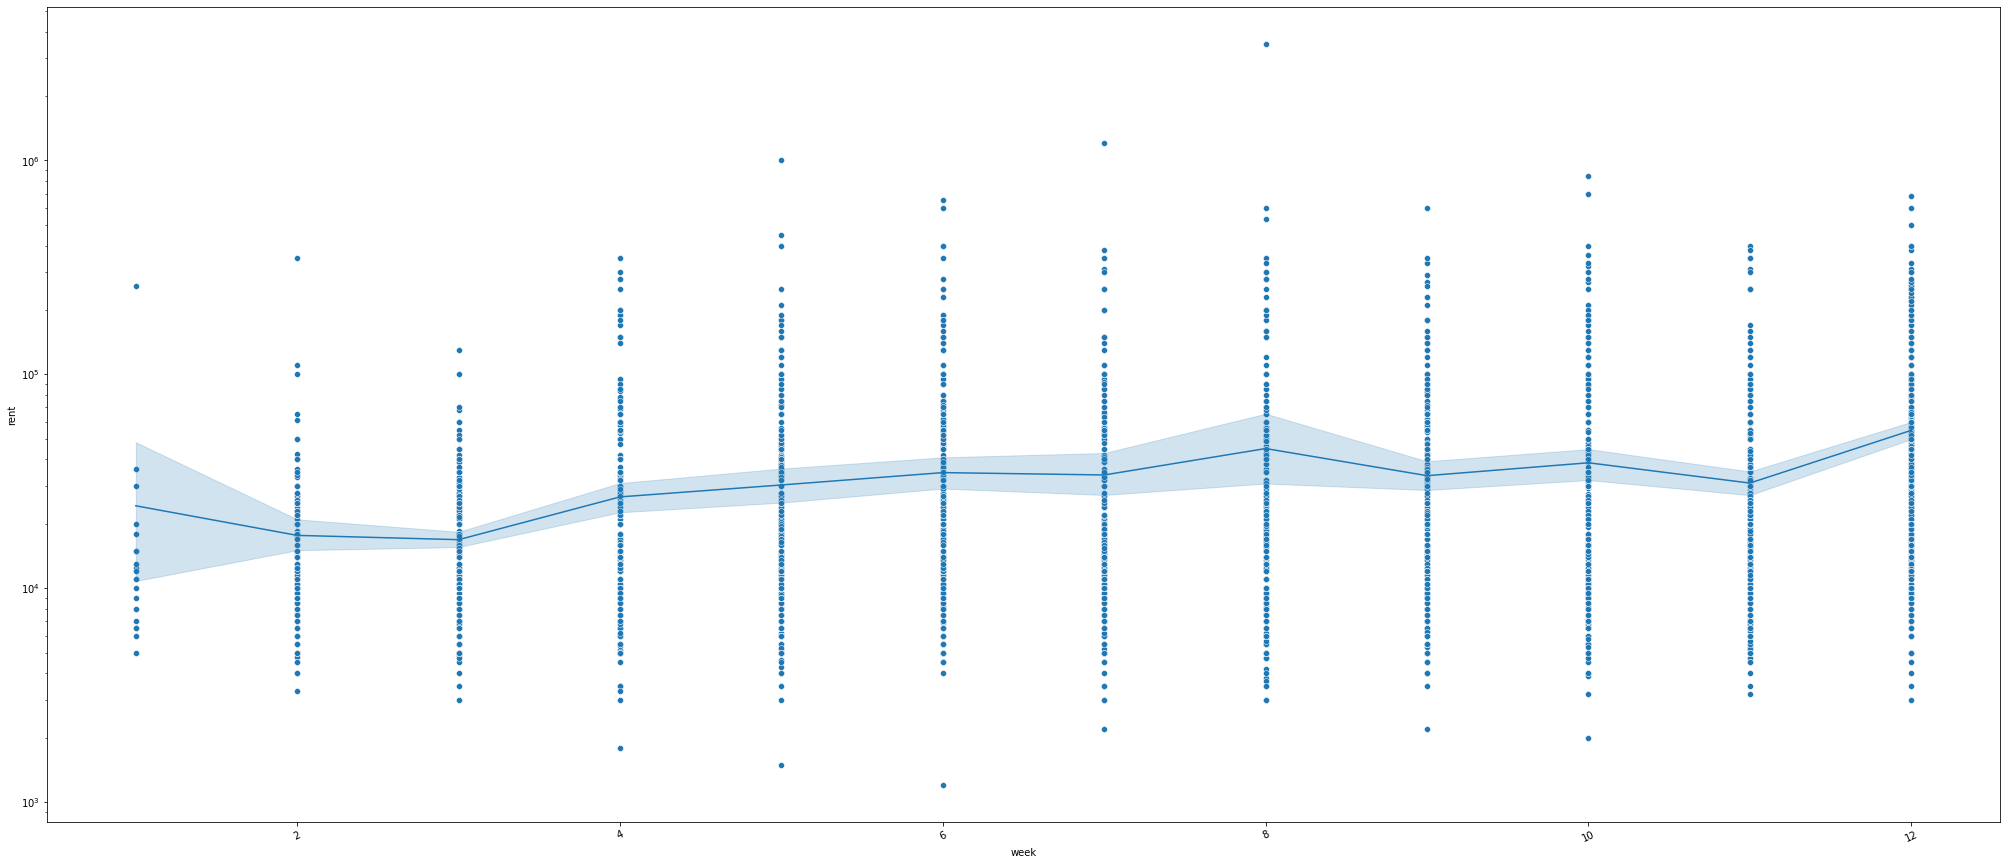

In [887]:
plt.figure(figsize=(35, 15))
sns.scatterplot(x="week", y="rent",
#              hue="city",
             data=df_grouped_week)
sns.lineplot(x="week", y="rent",
#              hue="city",
             data=df_grouped_week)
plt.xticks( rotation=25 )
plt.yscale('log')
plt.show()


In [888]:
df_grouped_week

posted_on  bhk   rent  size  floor  area_type  area_locality  city  \
53   2022-04-23    2  15000  1000      1          1             34     1   
109  2022-04-25    1   6000   220      1          1             76     1   
125  2022-04-25    2  18000  1300      7          1             19     1   
140  2022-04-25    2  12500   750      2          2             92     1   
183  2022-04-25    2  11000   550      9          2            119     1   
...         ...  ...    ...   ...    ...        ...            ...   ...   
4737 2022-07-07    3  15000  1500     30          1           2187     6   
4738 2022-07-06    2  17000   855     10          2           2234     6   
4739 2022-07-06    2  25000  1040     18          2           1922     6   
4743 2022-07-10    3  35000  1750     26          2           1897     6   
4744 2022-07-06    3  45000  1500    480          2           1922     6   

      furnishing_status  tenant_preferred  bathroom  point_of_contact  \
53                    1                 1         2                 1   
109                   3                 1         1                 1   
125                   1                 1         2                 1   
140                   1                 1         2                 1   
183                   1                 1         1                 1   
...                 ...               ...       ...               ...   
4737                  2                 1         3                 1   
4738                  1                 2         2                 2   
4739                  1                 2         2                 1   
4743                  2                 1         3                 2   
4744                  2                 3         2                 2   

      total_floor  current_floor  week  
53              2              0     1  
109             2              0     1  
125             1              1     1  
140             3              1     1  
183             3              2     1  
...           ...            ...   ...  
4737            5             -2    12  
4738            5              4    12  
4739            2              2    12  
4743            2              3    12  
4744            5             23    12  

[4746 rows x 15 columns]

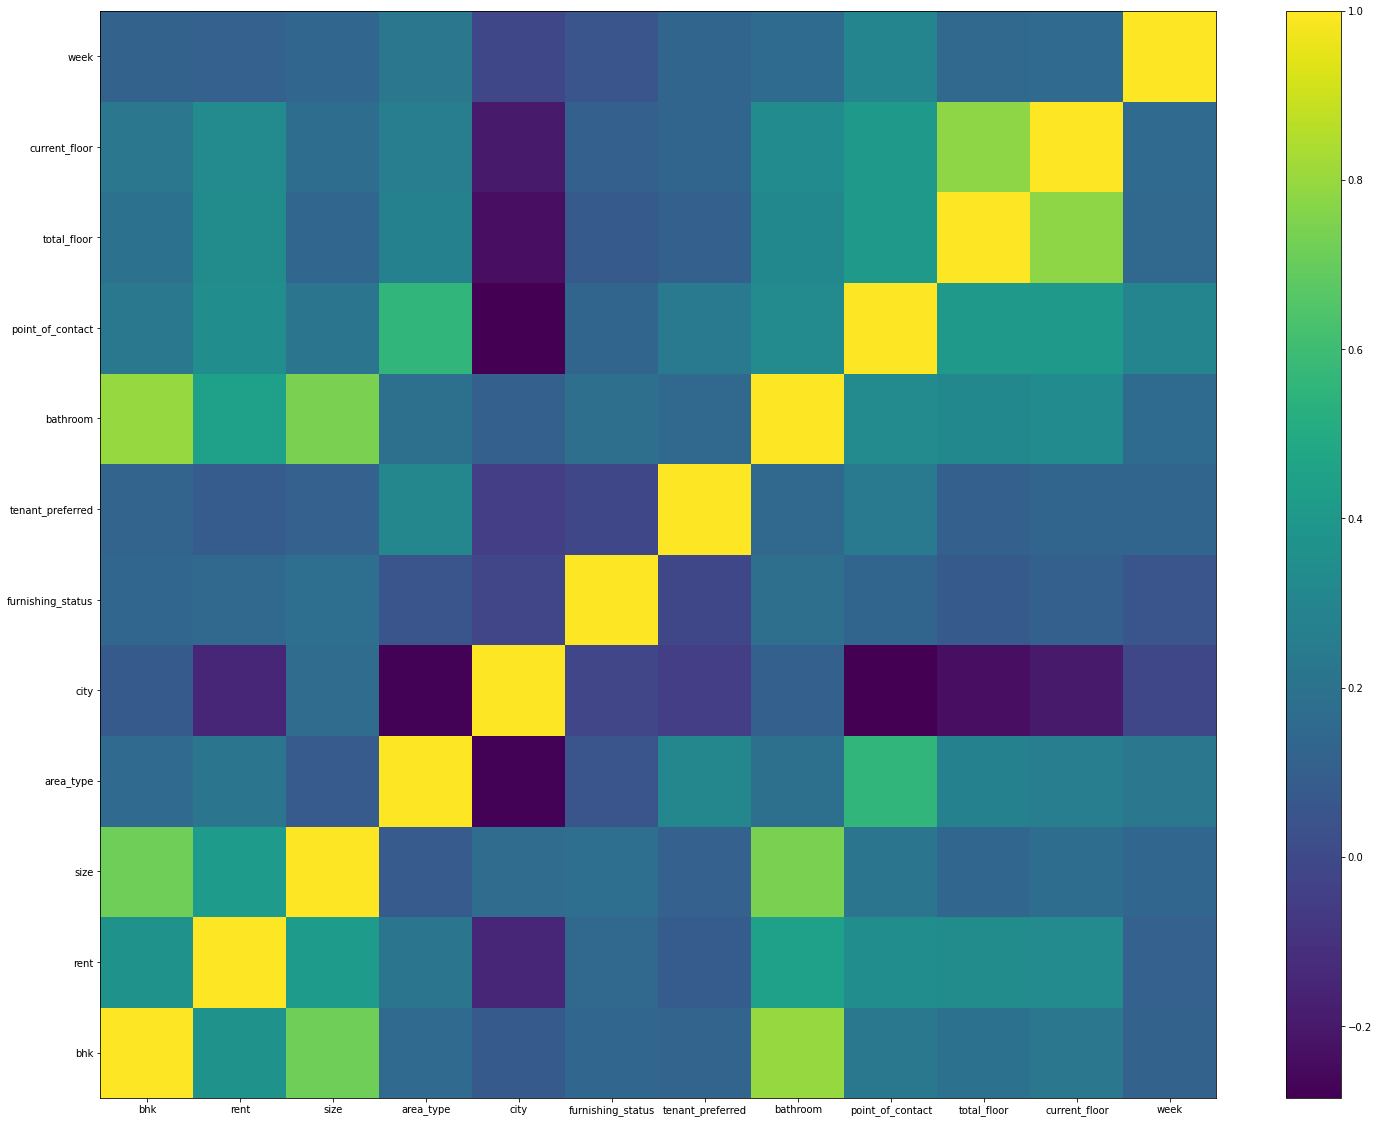

In [891]:
var_to_use = ["bhk","rent","size","area_type","city","furnishing_status","tenant_preferred","bathroom","point_of_contact","total_floor","current_floor","week"]
plt.figure(figsize=[25,20])
plt.pcolor(df_grouped_week[var_to_use].corr()) # do the feature correlation plot

# fill in the indices
plt.yticks(np.arange(0.5, len(var_to_use), 1), var_to_use)
plt.xticks(np.arange(0.5, len(var_to_use), 1), var_to_use)
plt.colorbar()
plt.show()

In [ ]:
plt.figure(figsize=(25, 15))
corr=df[var_to_use].corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True,annot=True)
plt.show()

In [750]:
drange=pd.date_range(start=df.posted_on.min(),end=df.posted_on.max(),freq='7D',closed=None)
drange=drange.strftime('%Y-%m-%d')
week_label=[f'Week {i+1}' for i in range(len(drange))]
range_label = [posted_on[i] for i in drange]

KeyError: '2022-04-20'

In [656]:
ymd=df.posted_on.apply(lambda x: x.strftime('%Y-%m-%d'))

In [709]:
drange

DatetimeIndex(['2022-04-13', '2022-04-20', '2022-04-27', '2022-05-04',
               '2022-05-11', '2022-05-18', '2022-05-25', '2022-06-01',
               '2022-06-08', '2022-06-15', '2022-06-22', '2022-06-29',
               '2022-07-06'],
              dtype='datetime64[ns]', freq='7D')

In [638]:
df.posted_onstrftime('%Y-%m-%d').unique()

AttributeError: 'Series' object has no attribute 'strftime'

In [614]:
# let's break up the date into 7 day interval

drange=pd.date_range(start=df.posted_on.min(),end=df.posted_on.max(),freq='7D',closed=None)
drange=drange.strftime('%Y-%m-%d')
week_label=[f'Week {i+1}' for i in range(len(drange))]
range_label = [posted_on[i] for i in drange]

# assert False
df_sorted['date_range'] = pd.cut(df['posted_on'],drange,labels=week_label) # this creates a new variable
df_sorted.date_range.describe()

ValueError: could not convert string to float: '1970-01-01'

In [592]:
list(drange)

[Timestamp('2022-04-13 00:00:00', freq='7D'),
 Timestamp('2022-04-20 00:00:00', freq='7D'),
 Timestamp('2022-04-27 00:00:00', freq='7D'),
 Timestamp('2022-05-04 00:00:00', freq='7D'),
 Timestamp('2022-05-11 00:00:00', freq='7D'),
 Timestamp('2022-05-18 00:00:00', freq='7D'),
 Timestamp('2022-05-25 00:00:00', freq='7D'),
 Timestamp('2022-06-01 00:00:00', freq='7D'),
 Timestamp('2022-06-08 00:00:00', freq='7D'),
 Timestamp('2022-06-15 00:00:00', freq='7D'),
 Timestamp('2022-06-22 00:00:00', freq='7D'),
 Timestamp('2022-06-29 00:00:00', freq='7D'),
 Timestamp('2022-07-06 00:00:00', freq='7D')]

In [604]:
list(drange.strftime('%Y-%m-%d'))

['2022-04-13',
 '2022-04-20',
 '2022-04-27',
 '2022-05-04',
 '2022-05-11',
 '2022-05-18',
 '2022-05-25',
 '2022-06-01',
 '2022-06-08',
 '2022-06-15',
 '2022-06-22',
 '2022-06-29',
 '2022-07-06']

In [599]:
list(drange.date)


[datetime.date(2022, 4, 13),
 datetime.date(2022, 4, 20),
 datetime.date(2022, 4, 27),
 datetime.date(2022, 5, 4),
 datetime.date(2022, 5, 11),
 datetime.date(2022, 5, 18),
 datetime.date(2022, 5, 25),
 datetime.date(2022, 6, 1),
 datetime.date(2022, 6, 8),
 datetime.date(2022, 6, 15),
 datetime.date(2022, 6, 22),
 datetime.date(2022, 6, 29),
 datetime.date(2022, 7, 6)]

In [721]:
df_sorted

posted_on  bhk    rent  size            floor    area_type  \
1222  2022-04-13    3  260000  1800     10 out of 11  Carpet Area   
244   2022-04-23    2    7000   450       1 out of 3  Carpet Area   
418   2022-04-23    1    6500   800  Ground out of 1  Carpet Area   
303   2022-04-23    2   20000   700       1 out of 2   Super Area   
413   2022-04-23    3   36125  1700  Ground out of 2   Super Area   
...          ...  ...     ...   ...              ...          ...   
4368  2022-07-10    3   95000  2700     23 out of 30  Carpet Area   
4126  2022-07-10    3   50000  2300       2 out of 5  Carpet Area   
4546  2022-07-10    3   67000  2310      3 out of 17   Super Area   
3743  2022-07-10    3   15000  1200       2 out of 5  Carpet Area   
3552  2022-07-11    2   12000   550  Ground out of 1   Super Area   

                    area_locality       city furnishing_status  \
1222                  JVPD Scheme     Mumbai         Furnished   
244                     safuipara    Kolkata         Furnished   
418                   Santragachi    Kolkata       Unfurnished   
303       Salt Lake City Sector 1    Kolkata         Furnished   
413                Salt Lake City    Kolkata       Unfurnished   
...                           ...        ...               ...   
4368                   Gachibowli  Hyderabad         Furnished   
4126  Ashok Nagar, Himayath Nagar  Hyderabad    Semi-Furnished   
4546                     Madhapur  Hyderabad    Semi-Furnished   
3743                  Madambakkam    Chennai       Unfurnished   
3552                  Choolaimedu    Chennai       Unfurnished   

      tenant_preferred  bathroom point_of_contact rent_range  
1222            Family         4    Contact Agent      vhigh  
244          Bachelors         2    Contact Owner        low  
418   Bachelors/Family         1    Contact Owner        low  
303   Bachelors/Family         1    Contact Owner       high  
413   Bachelors/Family         2    Contact Owner      vhigh  
...                ...       ...              ...        ...  
4368         Bachelors         3    Contact Agent      vhigh  
4126  Bachelors/Family         3    Contact Agent      vhigh  
4546            Family         3    Contact Agent      vhigh  
3743  Bachelors/Family         2    Contact Agent        mid  
3552  Bachelors/Family         2    Contact Owner        mid  

[4746 rows x 13 columns]

In [541]:
# let's break up the rent  variable into a discrete new variable
df_sorted['rent_range'] = pd.cut(df_sorted['rent'],
                                 [0,10000,16000,33000,35e6],
                                 labels=['low','mid','high','vhigh']) # this creates a new variable
df_sorted.rent_range.describe()

count     4746
unique       4
top        low
freq      1328
Name: rent_range, dtype: object

In [542]:
label

['Week 1', 'Week 2', 'Week 3', 'Week 4', 'Week 5', 'Week 6', 'Week 7']

In [535]:
drange

(DatetimeIndex(['2022-04-13 00:00:00', '2022-04-27 20:00:00',
                '2022-05-12 16:00:00', '2022-05-27 12:00:00',
                '2022-06-11 08:00:00', '2022-06-26 04:00:00',
                '2022-07-11 00:00:00'],
               dtype='datetime64[ns]', freq=None),)

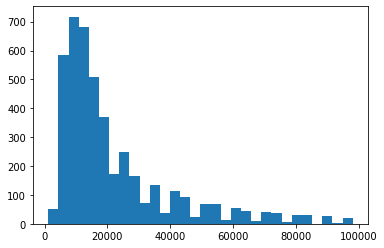

In [488]:
plt.figure()
plt.hist(df_sorted[df_sorted.rent<1e5].rent,bins=30)
# plt.xscale('log')
plt.show()

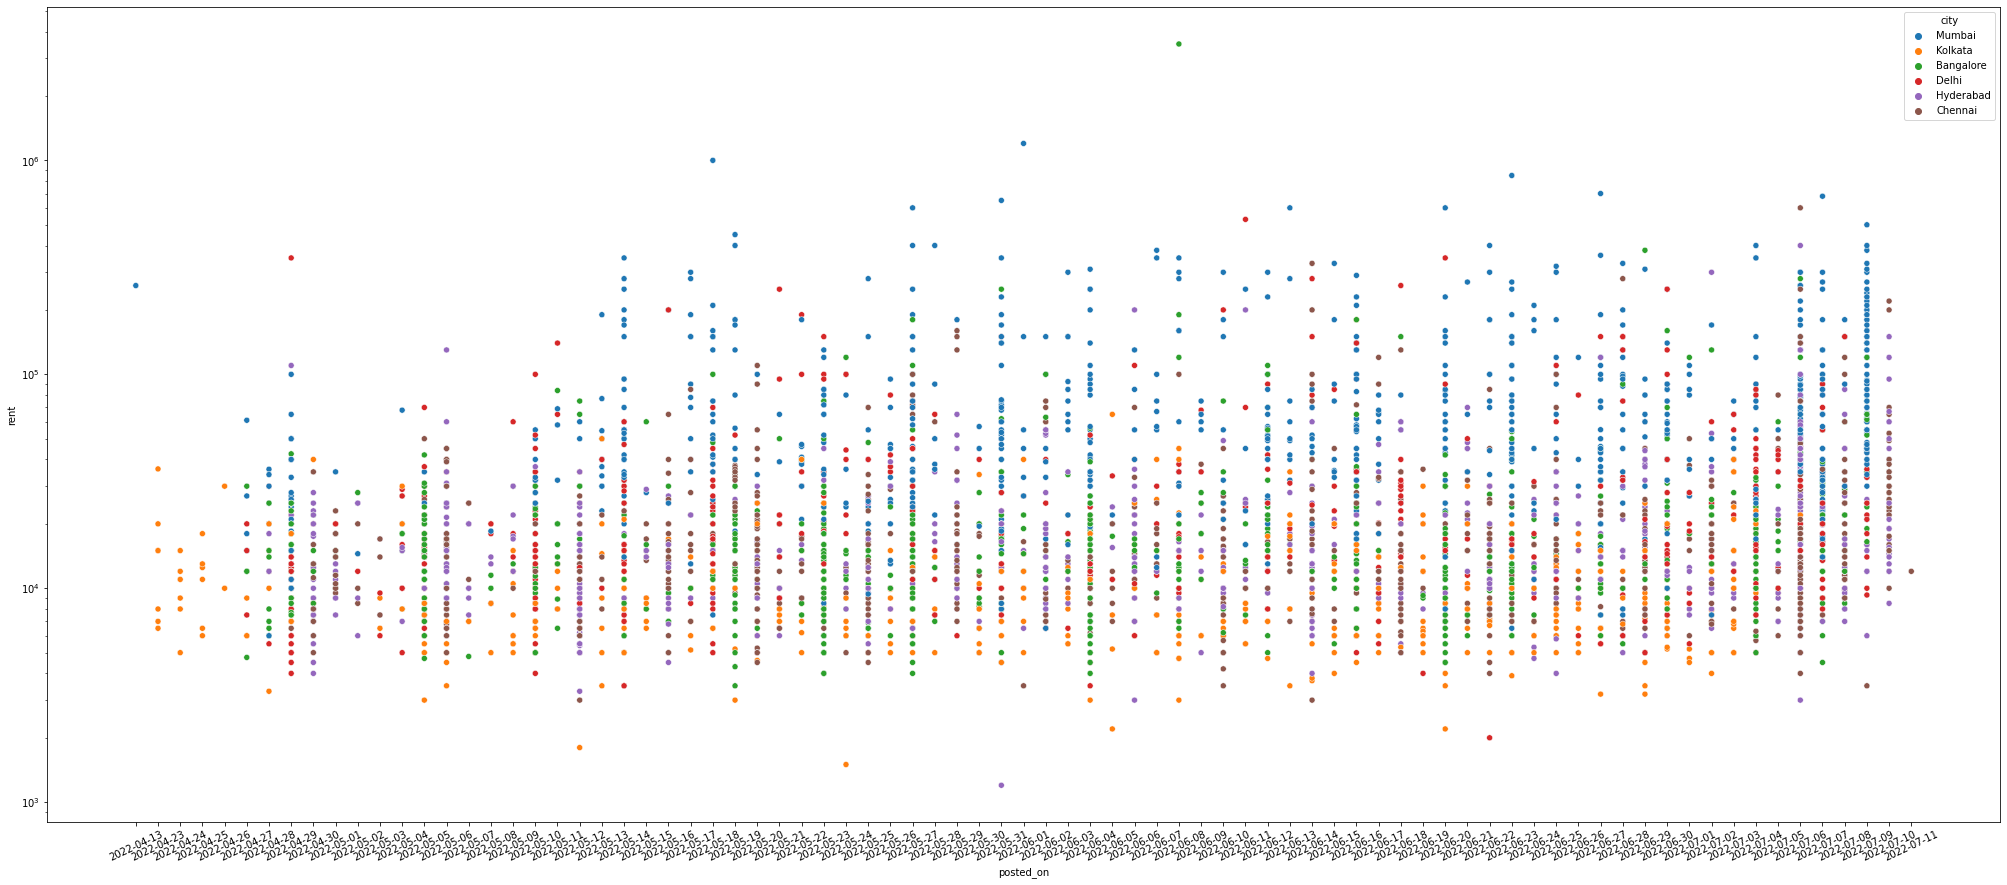

In [454]:
plt.figure(figsize=(35, 15))
sns.scatterplot(x="posted_on", y="rent",
             hue="city",
             data=df_sorted)
plt.xticks( rotation=25 )
plt.yscale('log')
plt.show()

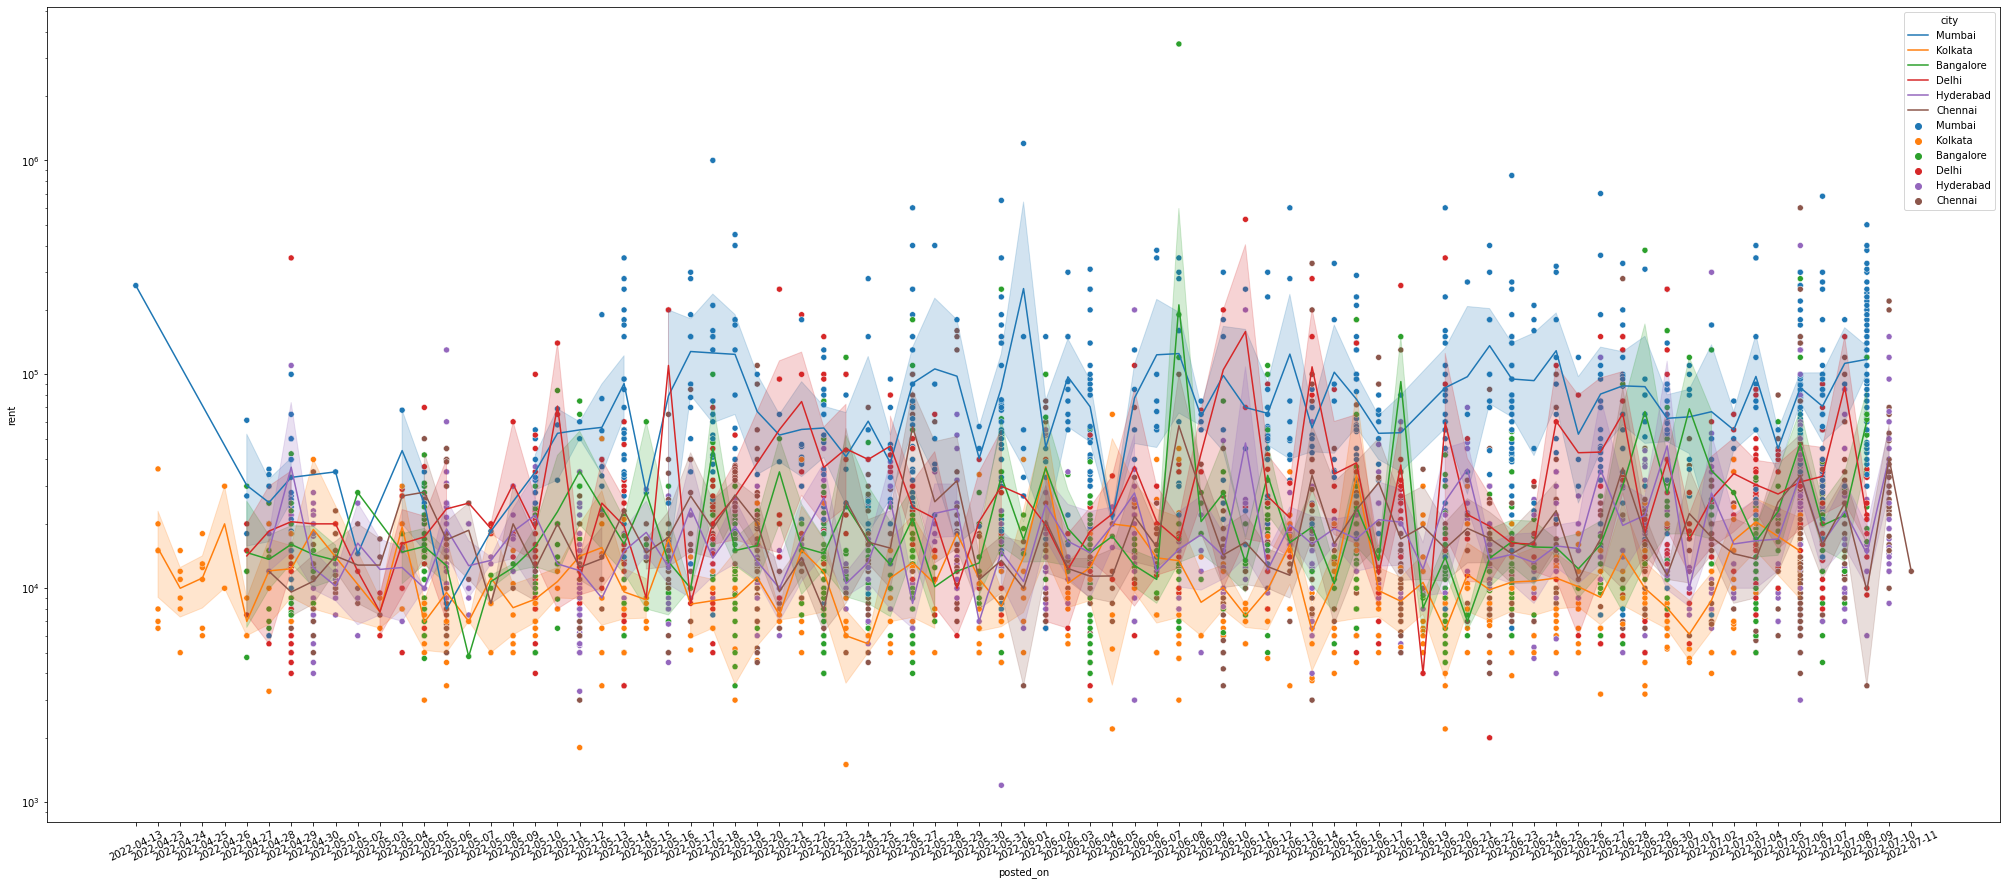

In [455]:
plt.figure(figsize=(35, 15))
sns.scatterplot(x="posted_on", y="rent",
             hue="city",
             data=df_sorted)
sns.lineplot(x="posted_on", y="rent",
             hue="city",
             data=df_sorted)
plt.xticks( rotation=25 )
plt.yscale('log')
plt.show()

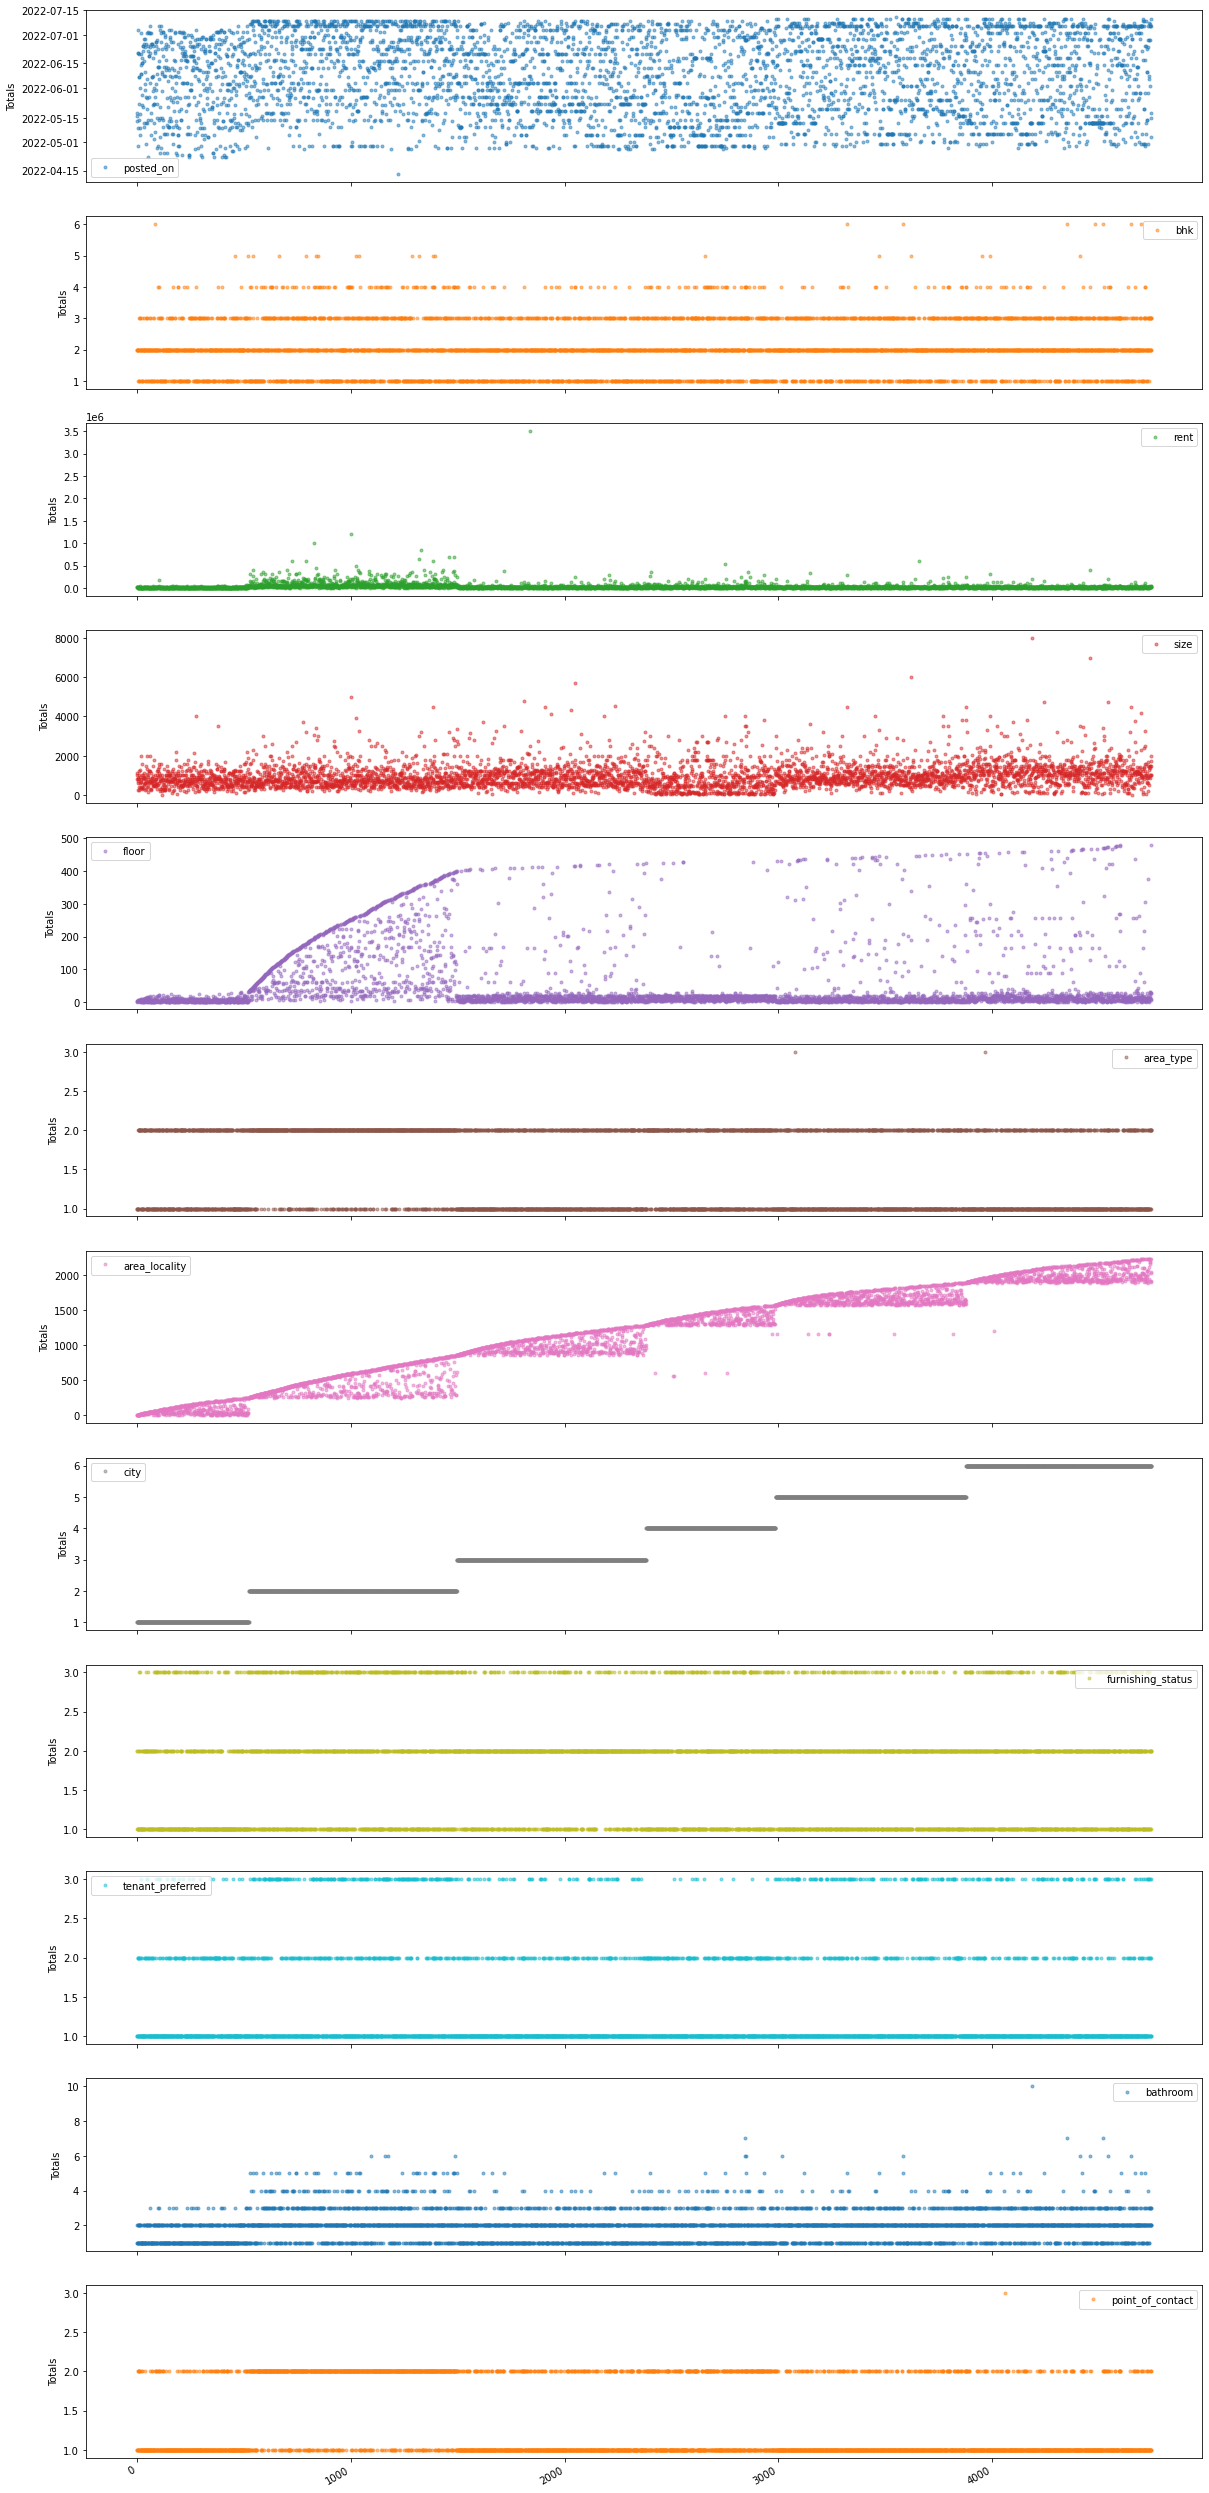

In [243]:
%matplotlib inline 
var_to_use = ["bhk","rent","size","area_type","city","furnishing_status","tenant_preferred","bathroom","point_of_contact"]
cols=["bhk","rent"]
axes = df.iloc[list(df['posted_on'].sort_values()._index)].plot(marker='.', alpha=0.5, linestyle='None', figsize=(20, 50), subplots=True)
for ax in axes:
    ax.set_ylabel('Totals')

<Figure size 432x288 with 0 Axes>

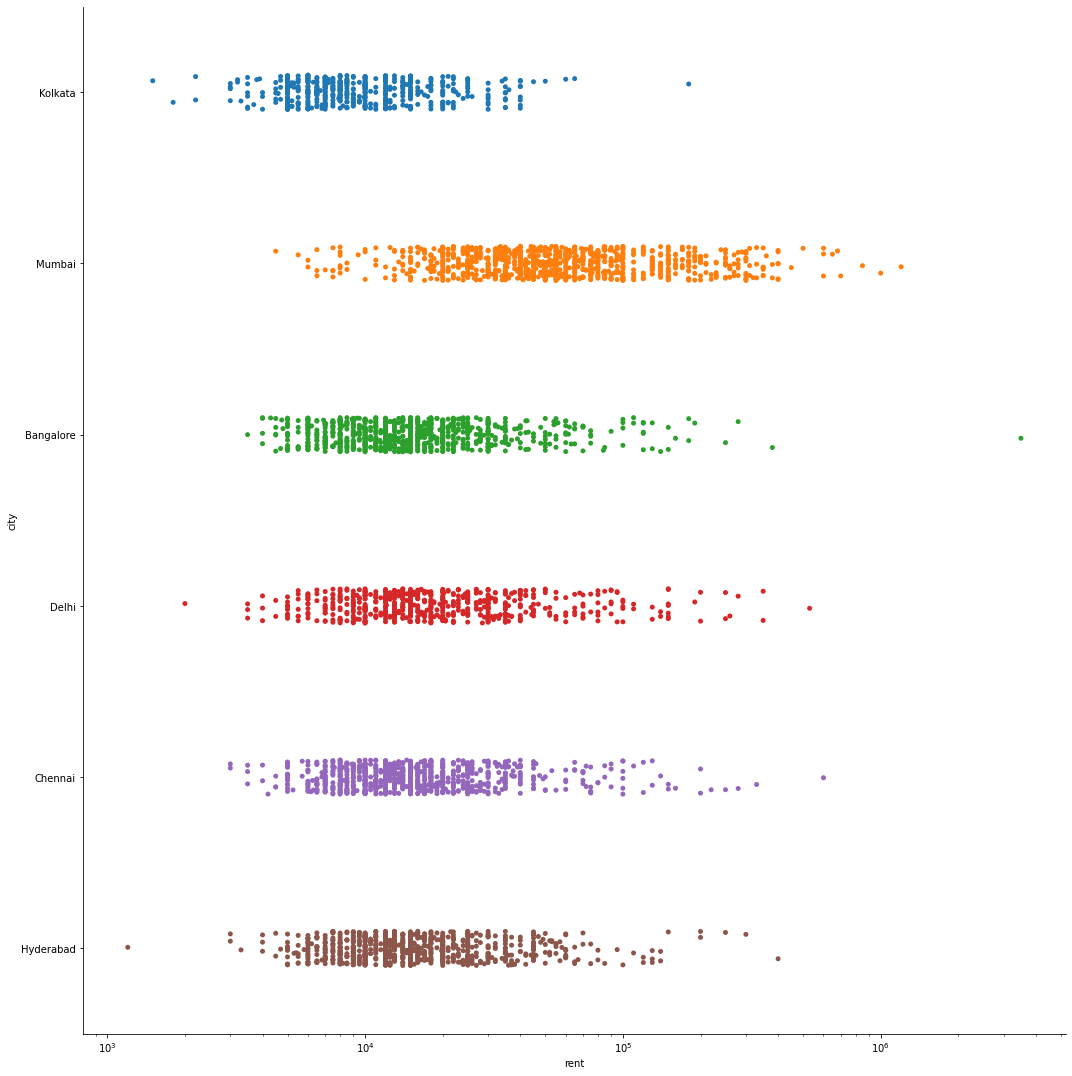

In [192]:
plt.figure()
sns.catplot(data=df0, x="rent", y="city",height=15)
plt.xscale('log')

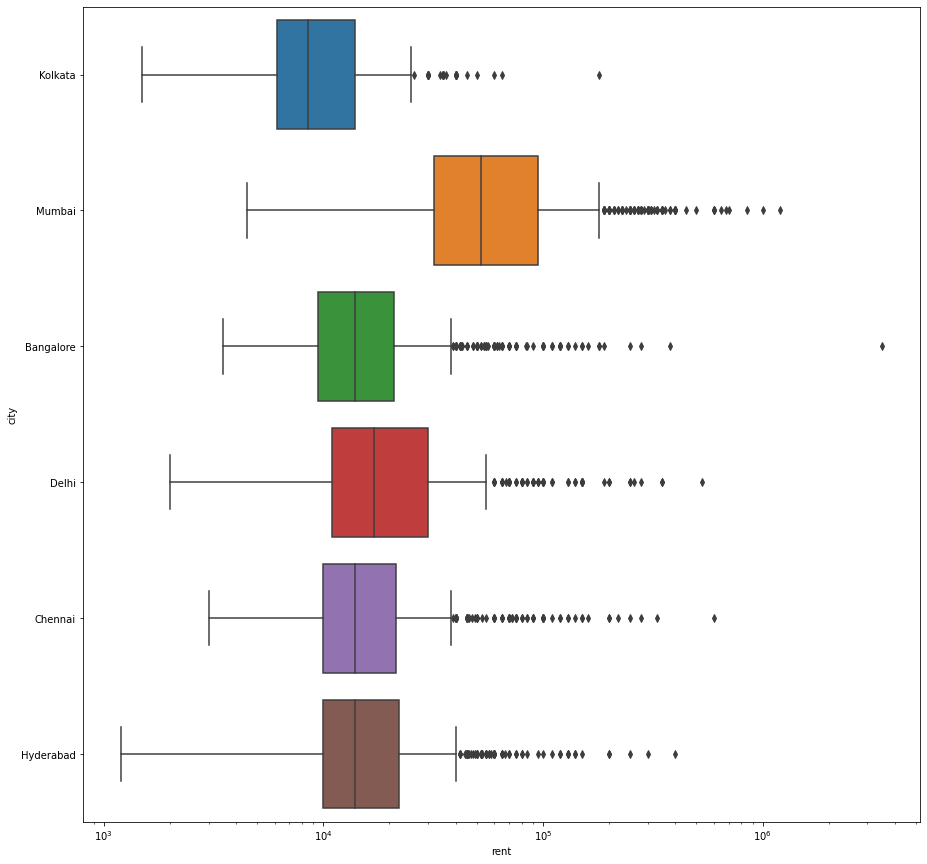

In [197]:
plt.figure(figsize=(15,15))
sns.boxplot(data=df0, x="rent", y="city")
plt.xscale('log')

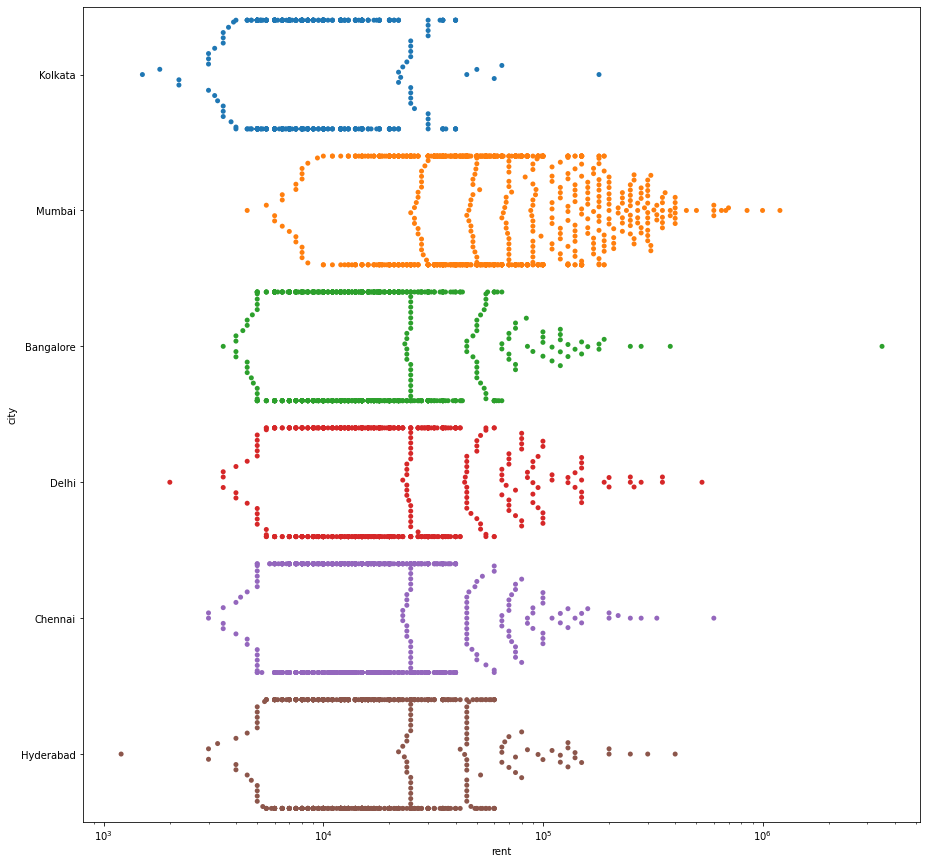

In [216]:
plt.figure(figsize=(15,15))
sns.swarmplot(data=df0, x="rent", y="city" )
plt.xscale("log")
plt.show()

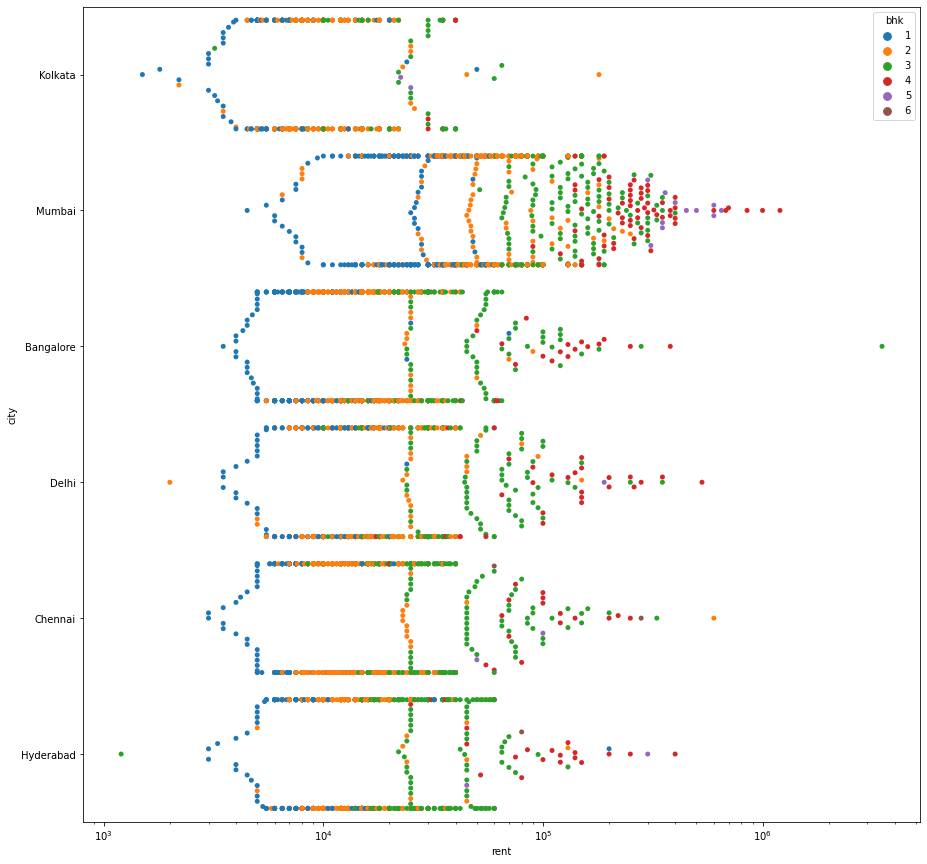

In [218]:
plt.figure(figsize=(15,15))
sns.swarmplot(data=df0, x="rent", y="city",hue='bhk' )
plt.xscale("log")
plt.show()

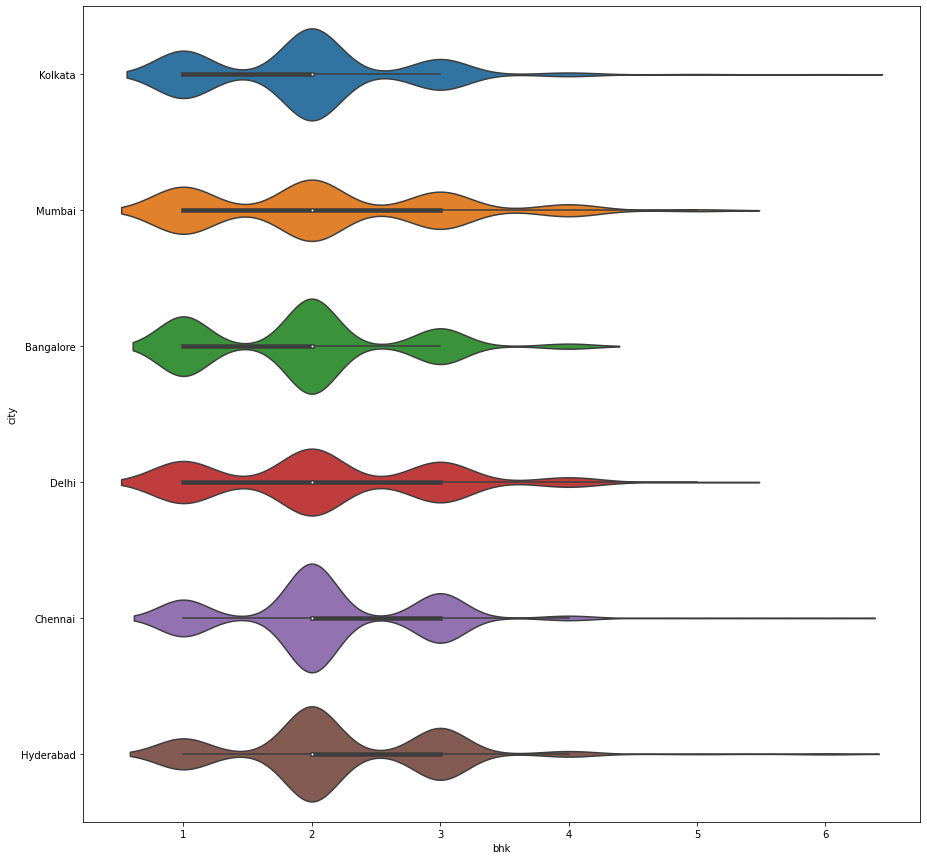

In [213]:
plt.figure(figsize=(15,15))
sns.violinplot(data=df0, x="bhk", y="city",gridsize=500 )
plt.show()

In [139]:
df_grouped_city = df.groupby(by='city')
for val,grp in df_grouped_city:
    print('There were',len(grp),' posting working in',city[val] ,'.')

print('---------------------------------------')
print('The Average Rate in each city and standard deviation :')
print(city,df_grouped_city.rent.mean(), df_grouped_city.rent.std() )


There were 524  posting working in Kolkata .
There were 972  posting working in Mumbai .
There were 886  posting working in Bangalore .
There were 605  posting working in Delhi .
There were 891  posting working in Chennai .
There were 868  posting working in Hyderabad .
---------------------------------------
The Average Rate in each city and standard deviation :
{1: 'Kolkata', 2: 'Mumbai', 3: 'Bangalore', 4: 'Delhi', 5: 'Chennai', 6: 'Hyderabad'} city
1    11645.173664
2    85321.204733
3    24966.365688
4    29461.983471
5    21614.092031
6    20555.048387
Name: rent, dtype: float64 city
1     11137.494632
2    102525.116720
3    120056.165622
4     43542.047016
5     33069.910236
6     26436.196407
Name: rent, dtype: float64


No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


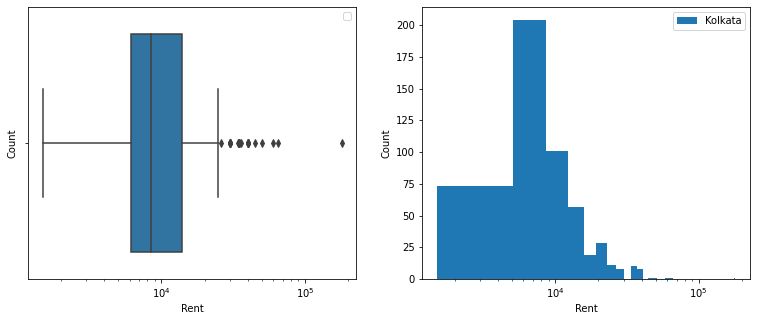

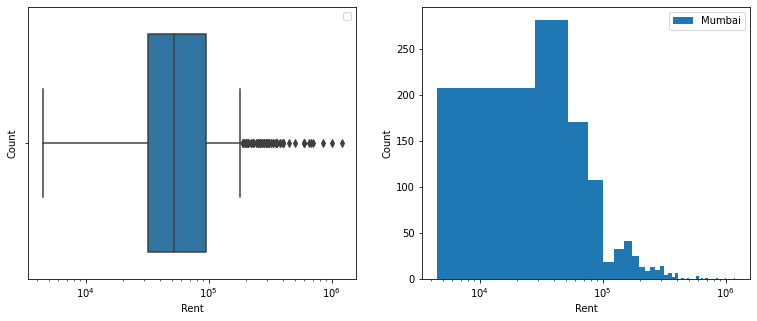

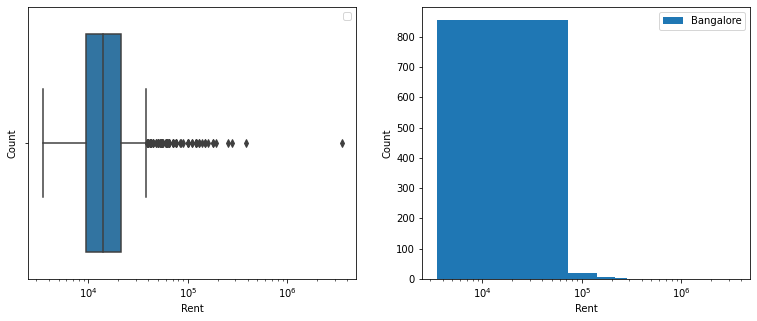

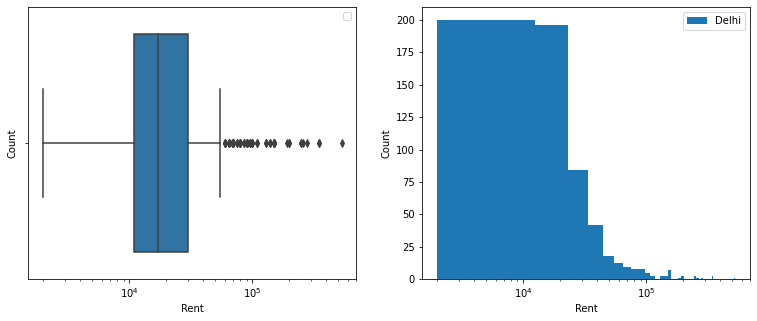

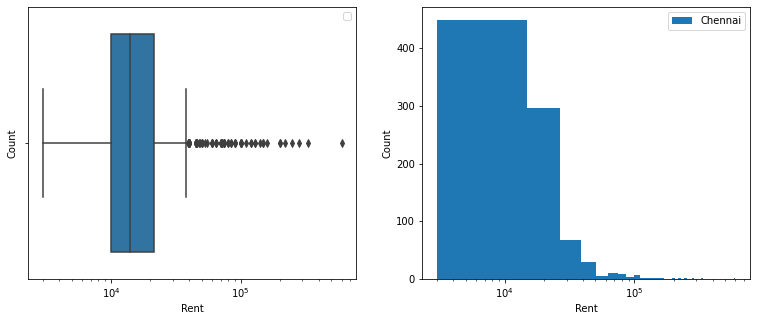

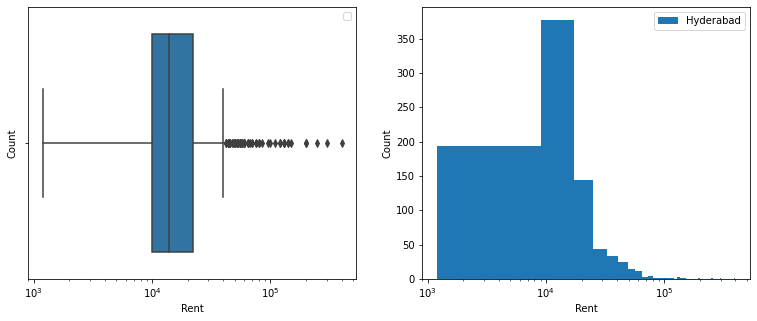

In [217]:
# plt.figure()
for val,grp in df_grouped_city:
#     print('There were',len(grp),' posting working in',city[val],'.')
    plt.subplots(figsize=(20, 5))
    
    plt.subplot(1,3,1)
    sns.boxplot(grp.rent)
#     plt.hist(grp.rent,label=city[val],bins=20)
# plt.yscale('log')
    plt.xlabel("Rent")
    plt.ylabel("Count")
    plt.xscale('log')
    plt.legend()
    
    plt.subplot(1,3,2)
    plt.hist(grp.rent,label=city[val],bins=50)
# plt.yscale('log')
    plt.xlabel("Rent")
    plt.ylabel("Count")
    plt.xscale('log')
    plt.legend()
    
#     plt.show()

In [138]:
print

{1: 'Kolkata', 2: 'Mumbai', 3: 'Bangalore', 4: 'Delhi', 5: 'Chennai', 6: 'Hyderabad'}


In [135]:
df0[df0.city=='Mumbai'].rent.mean()

85321.20473251029

In [73]:

print(df.dtypes)
print('===========')
print(df.info())

posted_on            datetime64[ns]
bhk                           int64
rent                          int64
size                          int64
floor                         int64
area_type                     int64
area_locality                 int64
city                          int64
furnishing_status             int64
tenant_preferred              int64
bathroom                      int64
point_of_contact              int64
dtype: object
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4746 entries, 0 to 4745
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   posted_on          4746 non-null   datetime64[ns]
 1   bhk                4746 non-null   int64         
 2   rent               4746 non-null   int64         
 3   size               4746 non-null   int64         
 4   floor              4746 non-null   int64         
 5   area_type          4746 non-null   int64         
 6   ar

In [74]:
city

{'Kolkata': 1,
 'Mumbai': 2,
 'Bangalore': 3,
 'Delhi': 4,
 'Chennai': 5,
 'Hyderabad': 6}

enc = OneHotEncoder(sparse=False).fit(df[['tenant_preferred']])
print(enc.categories_)
df_t= enc.transform(df[['tenant_preferred']])
print(df_t)
pd.DataFrame(df_t,columns=enc.categories_)


enc = OneHotEncoder(sparse=False).fit(df[['city']])
print(enc.categories_)
df_t= enc.transform(df[['city']])
print(df_t)
pd.DataFrame(df_t,columns=enc.categories_)


enc = OneHotEncoder(sparse=False).fit(df[['area_type']])
print(enc.categories_)
df_t= enc.transform(df[['area_type']])
print(df_t)
pd.DataFrame(df_t,columns=enc.categories_)

enc = OneHotEncoder(sparse=False).fit(df[['furnishing_status']])
print(enc.categories_)
df_t= enc.transform(df[['furnishing_status']])
print(df_t)

pd.DataFrame(df_t,columns=enc.categories_)

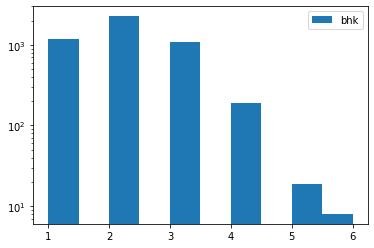

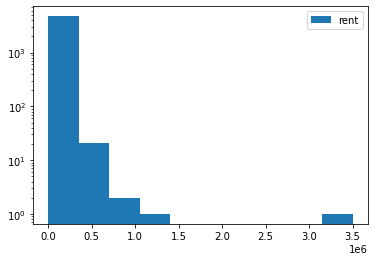

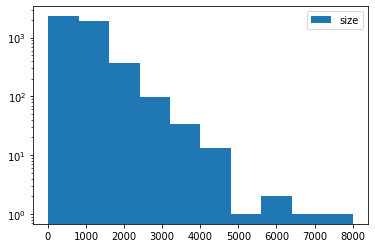

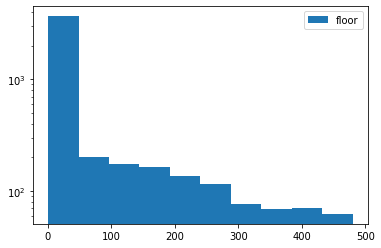

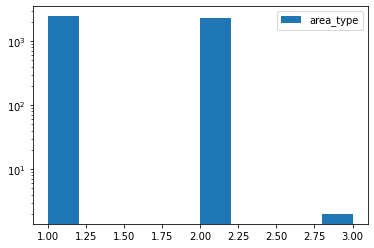

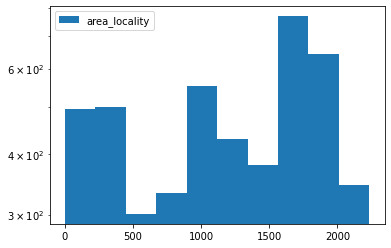

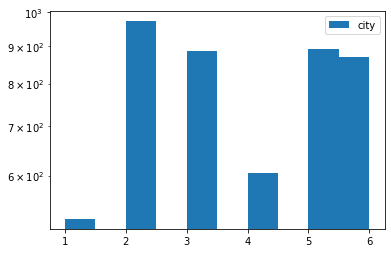

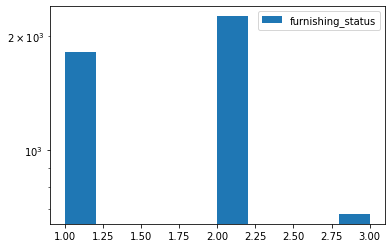

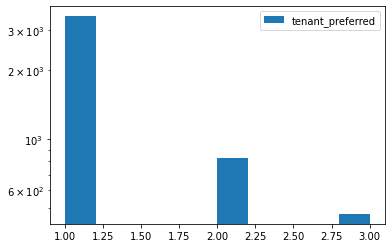

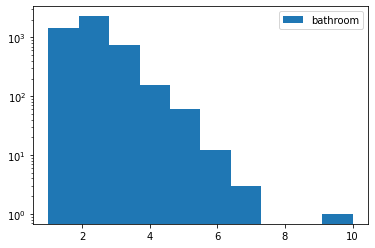

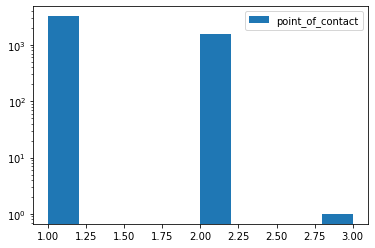

In [51]:
for var in df.columns:
    plt.hist(df[var],label=var)
    plt.legend()
    plt.yscale('log')
    plt.show()

In [54]:
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

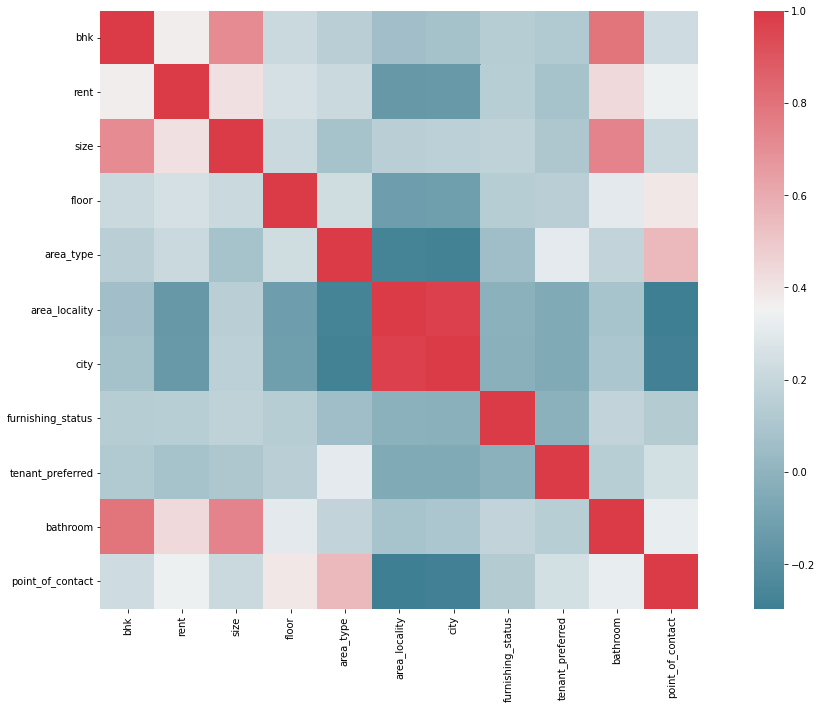

In [60]:
plt.figure(figsize=(20, 11))
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True)
plt.show()

In [13]:
df.city.unique()

array(['Kolkata', 'Mumbai', 'Bangalore', 'Delhi', 'Chennai', 'Hyderabad'],
      dtype=object)

In [15]:
len(df.city.unique())

6